<a href="https://colab.research.google.com/github/Quantum-Intelligence-Frontier/dldna/blob/main/notebooks/en/part_1/04_activation_function.ipynb" target="_parent">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 4 Activation Functions

> "If you know what you're doing, it's not research." - Albert Einstein

In the history of deep learning, activation functions and optimization techniques have made significant progress. When the McCulloch-Pitts artificial neuron model first appeared in 1943, it used only a simple threshold function (step function). This mimicked the biological neuron's behavior, where the neuron is activated only when the input exceeds a certain threshold. However, such simple forms of activation functions limited the ability of neural networks to express complex functions.

Until the 1980s, machine learning focused on feature engineering and sophisticated algorithm design. Neural networks were just one of many machine learning algorithms, and traditional algorithms like SVM (Support Vector Machine) or Random Forest often performed better. For example, in the MNIST handwritten digit recognition problem, SVM maintained the highest accuracy until 2012.

In 2012, AlexNet achieved overwhelming performance in the ImageNet challenge using efficient learning with GPUs, marking the beginning of the deep learning era. In 2017, Google's Transformer architecture further advanced this innovation, becoming the basis for today's large language models (LLMs) like GPT-4 and Gemini.

At the center of these advances were the evolution of **activation functions** and the development of **optimization techniques**. In this chapter, we will delve into activation functions in detail, providing the theoretical foundation you need to develop new models and solve complex problems.

## 4.1 Activation Functions: Introducing Non-Linearity into Neural Networks

> **Researcher's Dilemma:** Early neural network researchers realized that linear transformations alone could not solve complex problems. However, it was unclear which non-linear function would allow the neural network to learn effectively and solve various problems. Should they mimic the behavior of biological neurons or use other functions with better mathematical and computational properties?

Activation functions are the key elements that introduce non-linearity between neural network layers. The **Universal Approximation Theorem** (1988) mentioned in Section 1.4.1 proved that a neural network with one hidden layer and a *non-linear* activation function can approximate any continuous function. In other words, activation functions enable neural networks to transcend the limitations of simple linear models and act as universal function approximators by separating layers and introducing non-linearity.

### 4.1.1 Why Activation Functions are Needed: Overcoming the Limitations of Linearity

Without activation functions, no matter how many layers are stacked, the neural network would ultimately be equivalent to a *linear transformation*. This can be simply proven as follows:

Consider applying two linear transformations in sequence:

*   First layer: $y_1 = W_1x + b_1$
*   Second layer: $y_2 = W_2y_1 + b_2$

where $x$ is the input, $W_1$ and $W_2$ are weight matrices, and $b_1$ and $b_2$ are bias vectors. By substituting the first layer's equation into the second layer's equation:

$y_2 = W_2(W_1x + b_1) + b_2 = (W_2W_1)x + (W_2b_1 + b_2)$

Defining a new weight matrix $W' = W_2W_1$ and a new bias vector $b' = W_2b_1 + b_2$:

$y_2 = W'x + b'$

This is equivalent to *a single linear transformation*. The same applies no matter how many layers are stacked. Ultimately, linear transformations alone cannot express complex non-linear relationships.
### 4.1.2 Evolution of Activation Functions: From Biological Inspiration to Efficient Computation

*   **1943, McCulloch-Pitts Neuron:** The first artificial neuron model used a simple *threshold function*, or step function, which mimicked the biological neuron's behavior of only activating when the input exceeded a certain threshold.

    $$
    f(x) = \begin{cases}
    1, & \text{if } x \ge \theta \\
    0, & \text{if } x < \theta
    \end{cases}
    $$

    Here, $\theta$ is the threshold.

*   **1960s, Sigmoid Function:** The sigmoid function was introduced to model the firing rate of biological neurons more smoothly. The sigmoid function is an S-shaped curve that compresses the input value into a value between 0 and 1.

    $$
    \sigma(x) = \frac{1}{1 + e^{-x}}
    $$

    The sigmoid function has the advantage of being differentiable, allowing it to be used with gradient descent-based learning algorithms. However, the sigmoid function was also identified as one of the causes of the *vanishing gradient problem* in deep neural networks. When the input value is very large or small, the gradient (derivative) of the sigmoid function approaches 0, causing learning to slow down or stop.

*   **2010, ReLU (Rectified Linear Unit):** Nair and Hinton proposed the ReLU function, opening a new era in deep neural network learning. ReLU has a very simple form.

    $$
    ReLU(x) = \max(0, x)
    $$

    ReLU outputs the input as is if it is greater than 0, and outputs 0 if it is less than 0. Unlike the sigmoid function, ReLU has fewer vanishing gradient problems and higher computational efficiency. Thanks to these advantages, ReLU has greatly contributed to the success of deep neural networks and is now one of the most widely used activation functions.

### 4.1.3 Choosing Activation Functions: Model Size, Task, and Efficiency

The choice of activation function has a significant impact on the performance and efficiency of the model.

*   **Large Language Models (LLMs):** Since computational efficiency is crucial, there is a tendency to prefer simpler activation functions. The latest base models, such as Llama 3, GPT-4, and Gemini, adopt simple and efficient activation functions like GELU (Gaussian Error Linear Unit) or ReLU. In particular, Gemini 1.5 introduces the MoE (Mixture of Experts) architecture, which uses optimized activation functions for each expert network.

*   **Specialized Models:** When developing models optimized for specific tasks, more sophisticated approaches are being attempted. For example, in recent research like TEAL, methods to improve inference speed by up to 1.8 times through activation sparsity have been proposed. Additionally, studies on using adaptive activation functions that dynamically adjust their behavior based on the input data are also underway.

The choice of activation function should be made considering the model size, task characteristics, available computational resources, and required performance characteristics (accuracy, speed, memory usage, etc.).

## 4.2 Comparison of Activation Functions

> **Challenge:** Among numerous activation functions, which one is most suitable for a specific problem and architecture?
>
> **Researcher's Dilemma:** As of 2025, over 500 activation functions have been proposed, but there is no single perfect activation function for all situations. Researchers must understand the characteristics of each function and consider the problem's characteristics, model architecture, computational resources, and more to select the optimal activation function or even develop a new one.

The properties generally required for an activation function are as follows:
1. It must add non-linearity to the neural network
2. It should not increase computational complexity to the point of making training difficult
3. It must be differentiable so as not to hinder gradient flow
4. The data distribution at each layer of the neural network should be appropriate during training

Many efficient activation functions that meet these requirements have been proposed. It's hard to say which activation function is the best, as it depends on the model being trained and the data. The way to find the optimal activation function is through actual testing.

As of 2025, activation functions can be broadly classified into three categories:
1. Classical activation functions: Sigmoid, Tanh, ReLU, etc., which are fixed-shaped functions.
2. Adaptive activation functions: PReLU, TeLU, STAF, etc., which include parameters that adjust their shape during the learning process.
3. Specialized activation functions: ENN (Expressive Neural Network), Physics-informed activation functions, etc., which are optimized for specific domains.

This chapter compares several activation functions, primarily focusing on those implemented in PyTorch, but also implementing others like Swish and STAF by inheriting from nn.Module. The full implementation can be found in chapter_04/models/activations.py.

### 4.2.1 Creating Activation Functions

In [ ]:
!pip install dldna[colab] # in Colab
# !pip install dldna[all] # in your local

%load_ext autoreload
%autoreload 2

In [ ]:
import torch
import torch.nn as nn
import numpy as np

# Set seed
np.random.seed(7)
torch.manual_seed(7)

# STAF (Sinusoidal Trainable Activation Function)
class STAF(nn.Module):
    def __init__(self, tau=25):
        super().__init__()
        self.tau = tau
        self.C = nn.Parameter(torch.randn(tau))
        self.Omega = nn.Parameter(torch.randn(tau))
        self.Phi = nn.Parameter(torch.randn(tau))

    def forward(self, x):
        result = torch.zeros_like(x)
        for i in range(self.tau):
            result += self.C[i] * torch.sin(self.Omega[i] * x + self.Phi[i])
        return result

# TeLU (Trainable exponential Linear Unit)
class TeLU(nn.Module):
    def __init__(self, alpha=1.0):
        super().__init__()
        self.alpha = nn.Parameter(torch.tensor(alpha))

    def forward(self, x):
        return torch.where(x > 0, x, self.alpha * (torch.exp(x) - 1))

# Swish (Custom Implementation)
class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

# Activation function dictionary
act_functions = {
    # Classic activation functions
    "Sigmoid": nn.Sigmoid,     # Binary classification output layer
    "Tanh": nn.Tanh,          # RNN/LSTM

    # Modern basic activation functions
    "ReLU": nn.ReLU,          # CNN default
    "GELU": nn.GELU,          # Transformer standard
    "Mish": nn.Mish,          # Performance/stability balance

    # ReLU variants
    "LeakyReLU": nn.LeakyReLU,# Handles negative inputs
    "SiLU": nn.SiLU,          # Efficient sigmoid
    "Hardswish": nn.Hardswish,# Mobile optimized
    "Swish": Swish,           # Custom implementation

    # Adaptive/trainable activation functions
    "PReLU": nn.PReLU,        # Trainable slope
    "RReLU": nn.RReLU,        # Randomized slope
    "TeLU": TeLU,             # Trainable exponential
    "STAF": STAF             # Fourier-based
}

STAF is a recently introduced activation function at ICLR 2025, which uses Fourier series-based learnable parameters. ENN adopts a method to improve the representation of the network by utilizing DCT. TeLU is an extended version of ELU, where the alpha parameter is made learnable.


### 4.2.2 Visualization of Activation Functions

The activation functions and gradients are visualized to compare their characteristics. Using PyTorch's automatic differentiation feature, gradients can be calculated simply by calling backward(). The following is an example of visually analyzing the characteristics of activation functions. The calculation of gradient flow is done by passing a given activation function through a constant range of input values. The `compute_gradient_flow` method plays this role.

In [3]:
def compute_gradient_flow(activation, x_range=(-5, 5), y_range=(-5, 5), points=100):
    """
    Computes the 3D gradient flow.

    Calculates the output surface of the activation function for two-dimensional
    inputs and the magnitude of the gradient with respect to those inputs.

    Args:
        activation: Activation function (nn.Module or function).
        x_range (tuple): Range for the x-axis (default: (-5, 5)).
        y_range (tuple): Range for the y-axis (default: (-5, 5)).
        points (int): Number of points to use for each axis (default: 100).

    Returns:
        X, Y (ndarray): Meshgrid coordinates.
        Z (ndarray): Activation function output values.
        grad_magnitude (ndarray): Gradient magnitude at each point.
    """
    x = np.linspace(x_range[0], x_range[1], points)
    y = np.linspace(y_range[0], y_range[1], points)
    X, Y = np.meshgrid(x, y)

    # Stack the two dimensions to create a 2D input tensor (first row: X, second row: Y)
    input_tensor = torch.tensor(np.stack([X, Y], axis=0), dtype=torch.float32, requires_grad=True)

    # Construct the surface as the sum of the activation function outputs for the two inputs
    Z = activation(input_tensor[0]) + activation(input_tensor[1])
    Z.sum().backward()

    grad_x = input_tensor.grad[0].numpy()
    grad_y = input_tensor.grad[1].numpy()
    grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)

Performs 3D visualization for all defined activation functions.

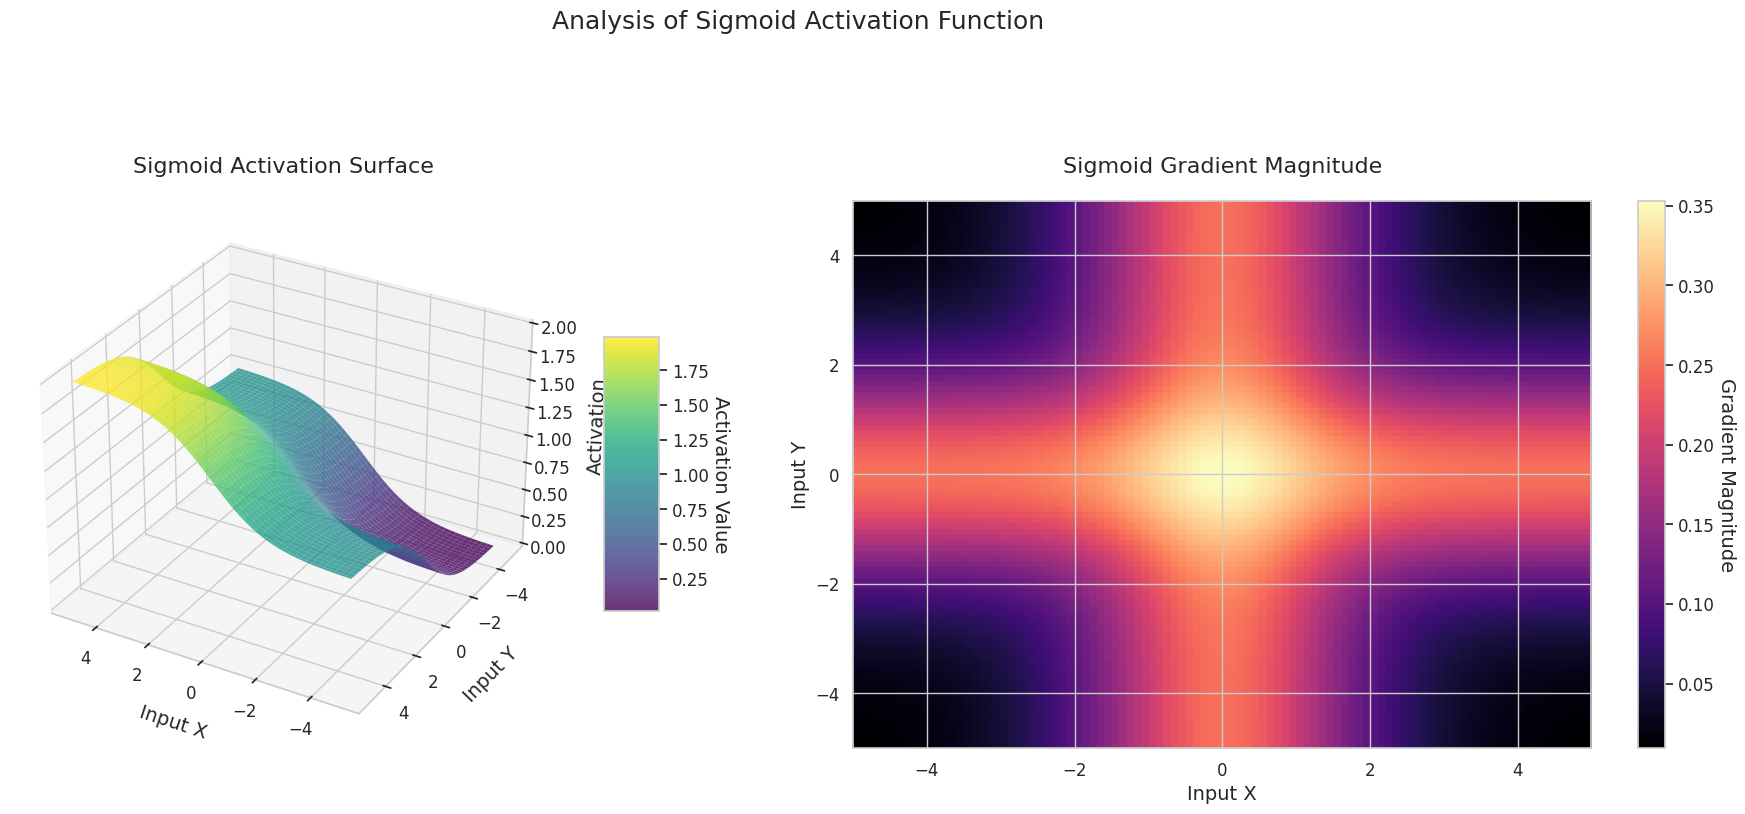

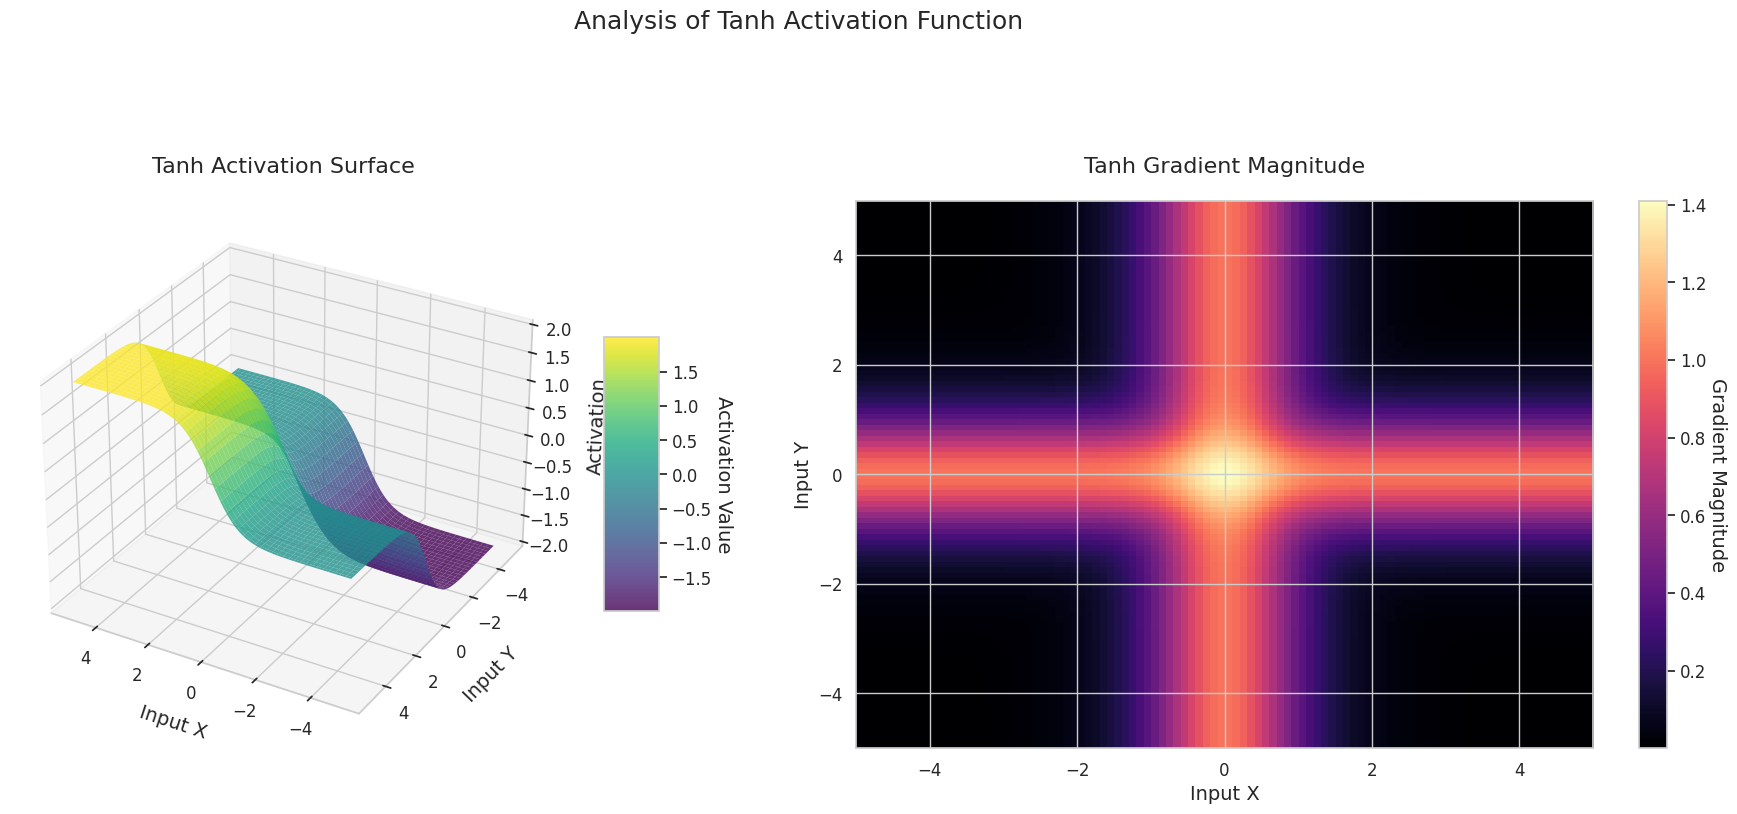

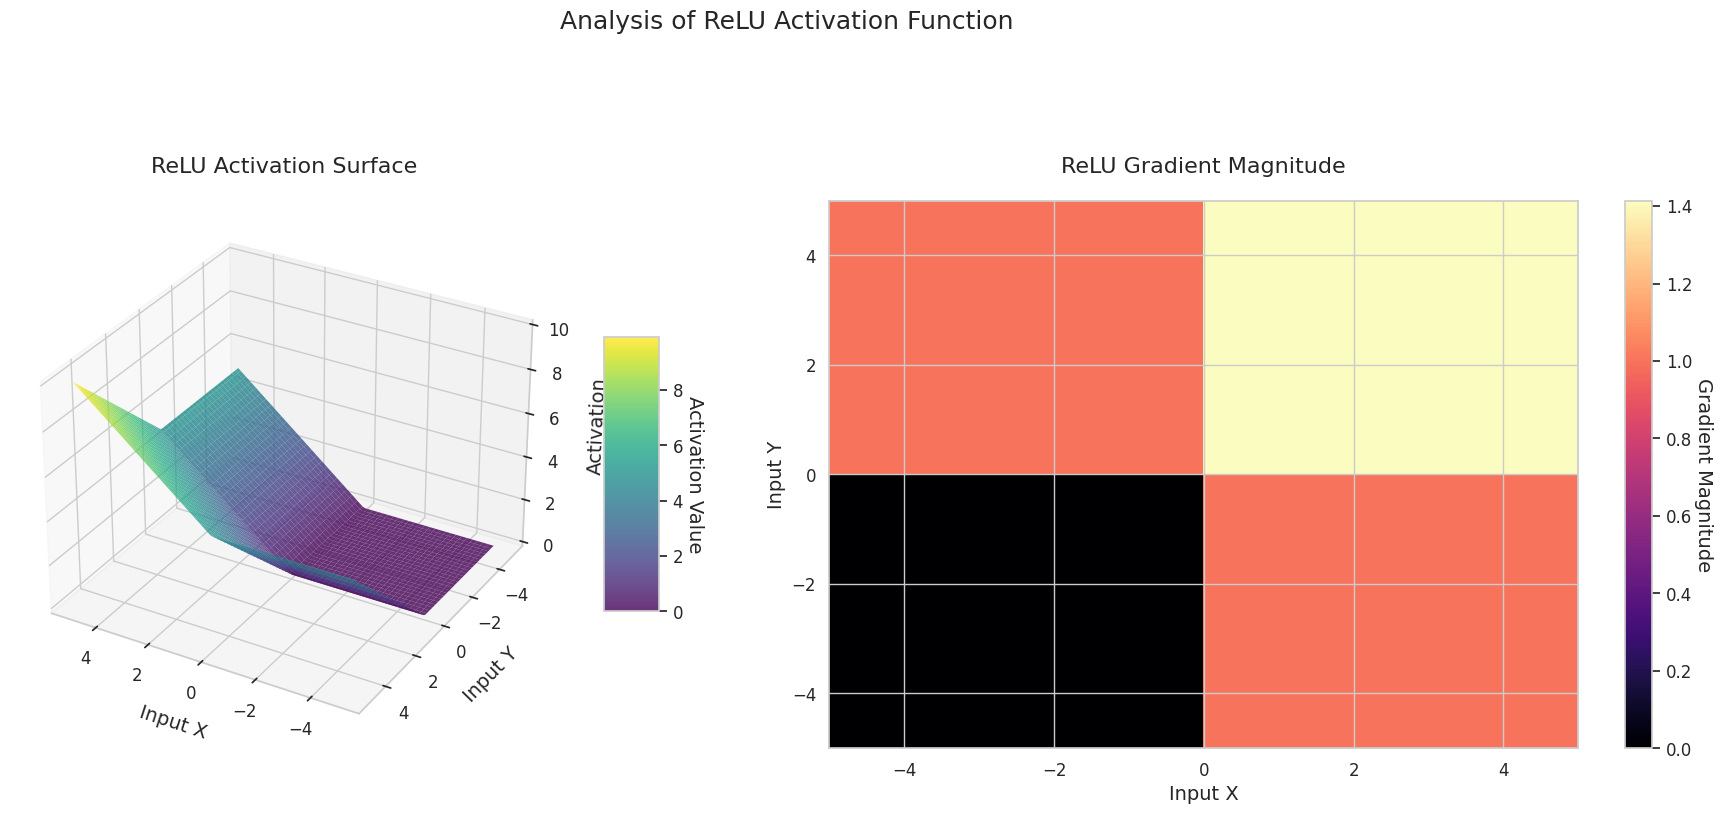

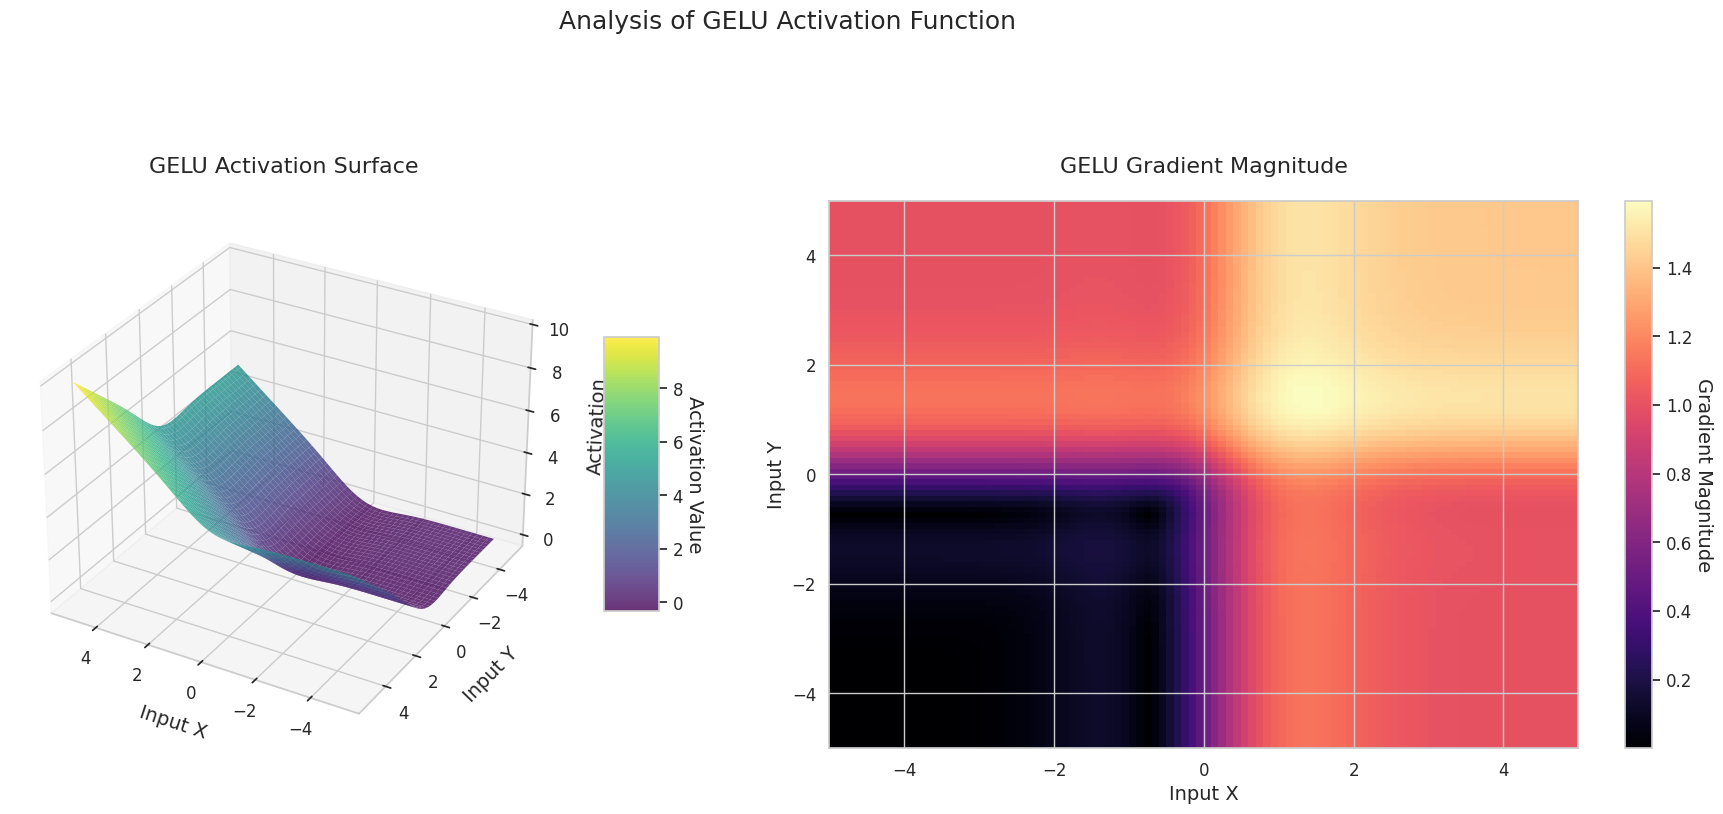

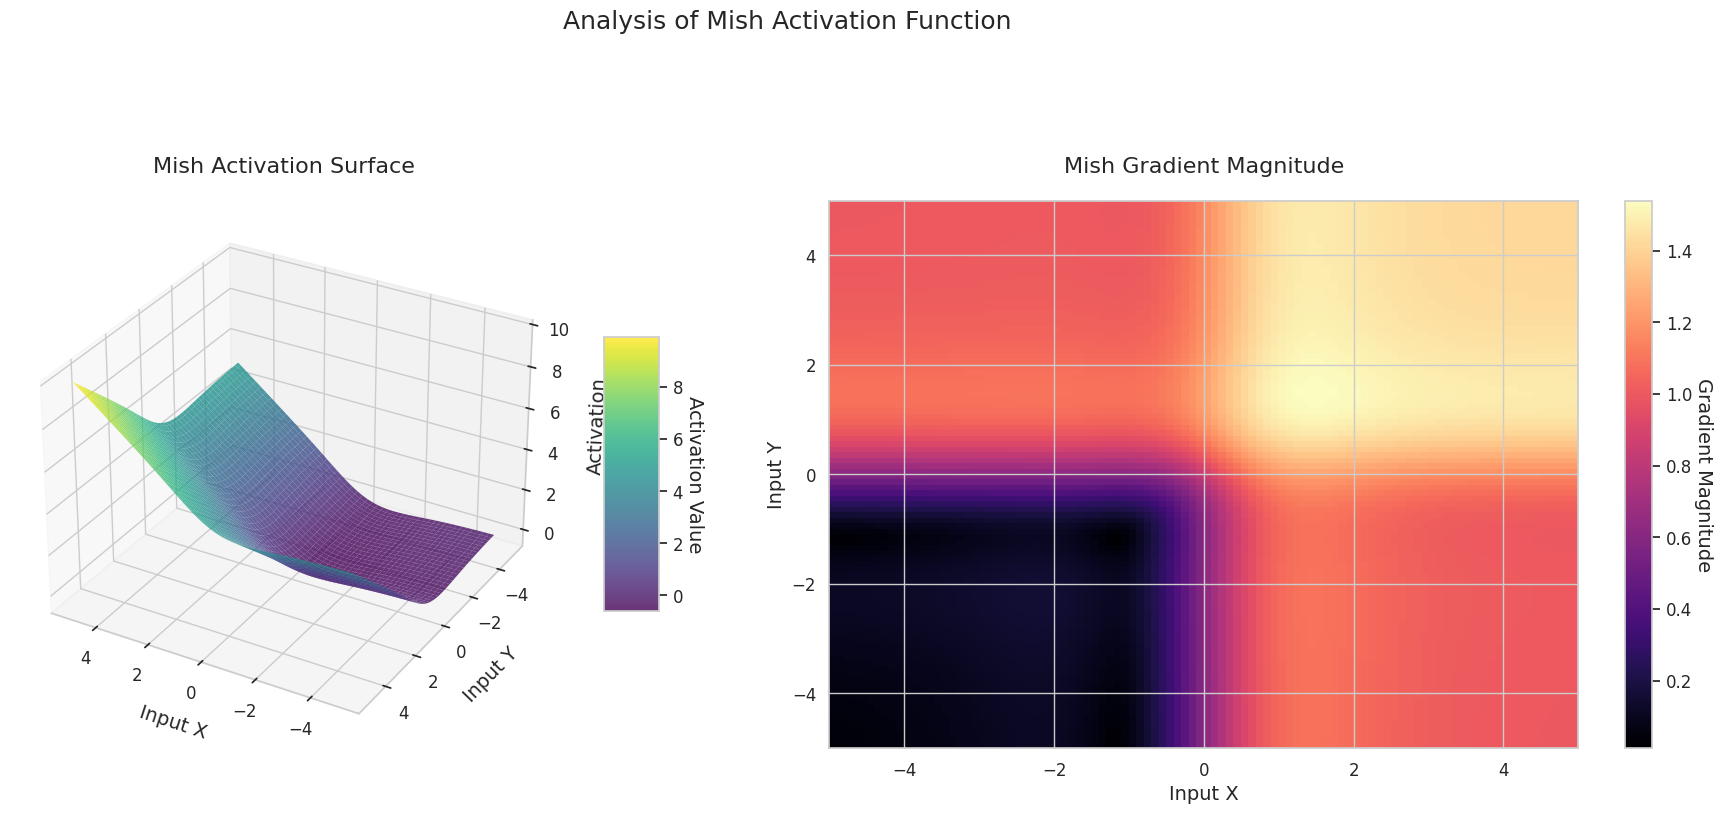

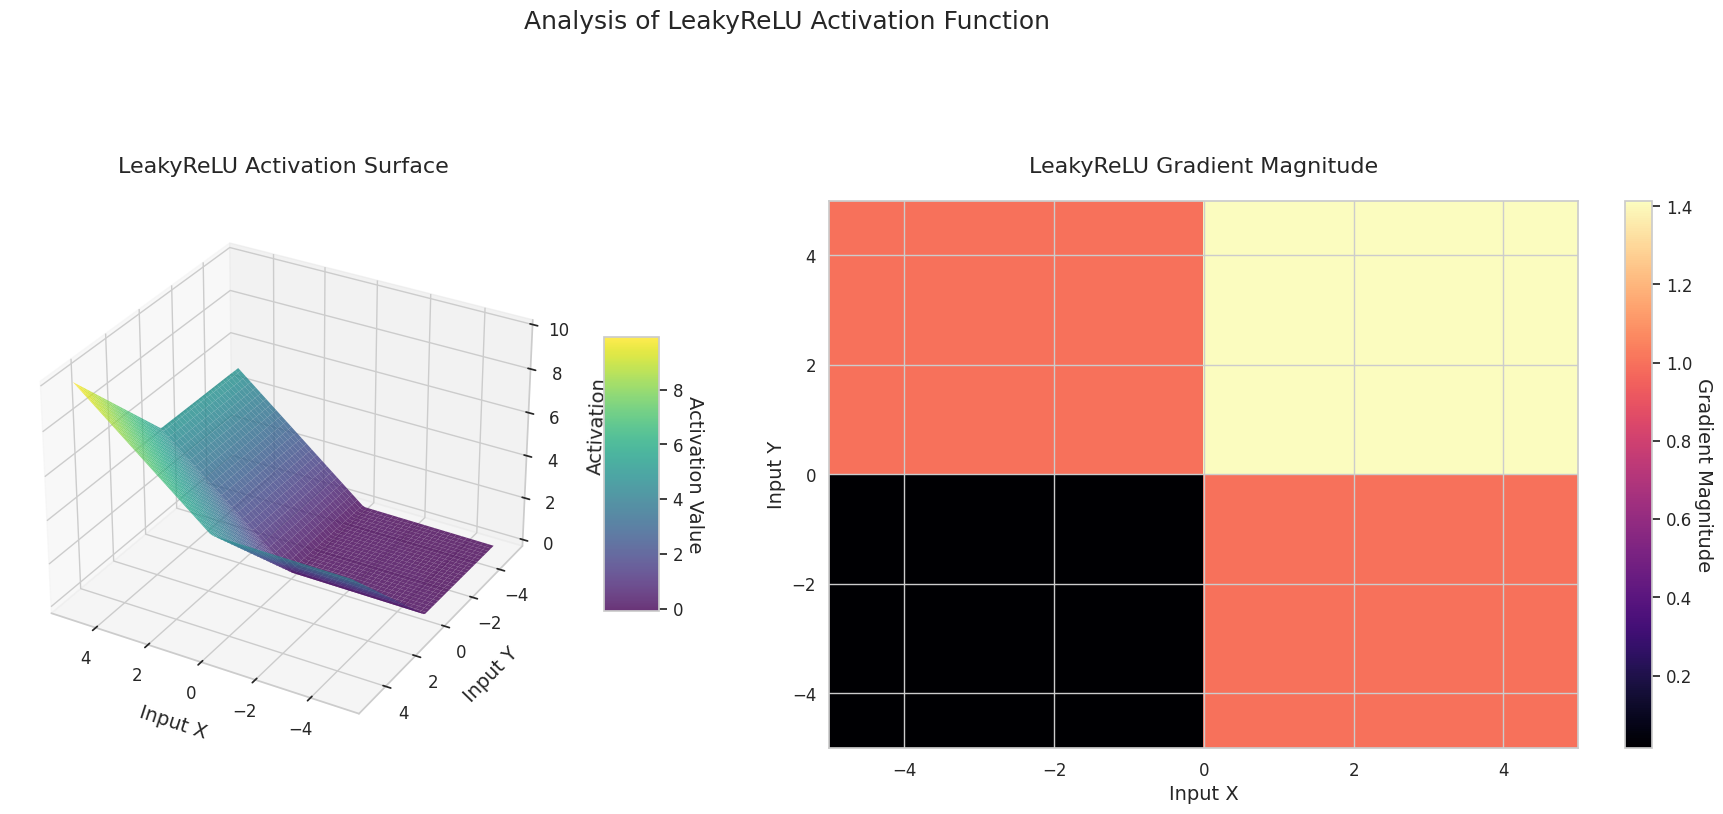

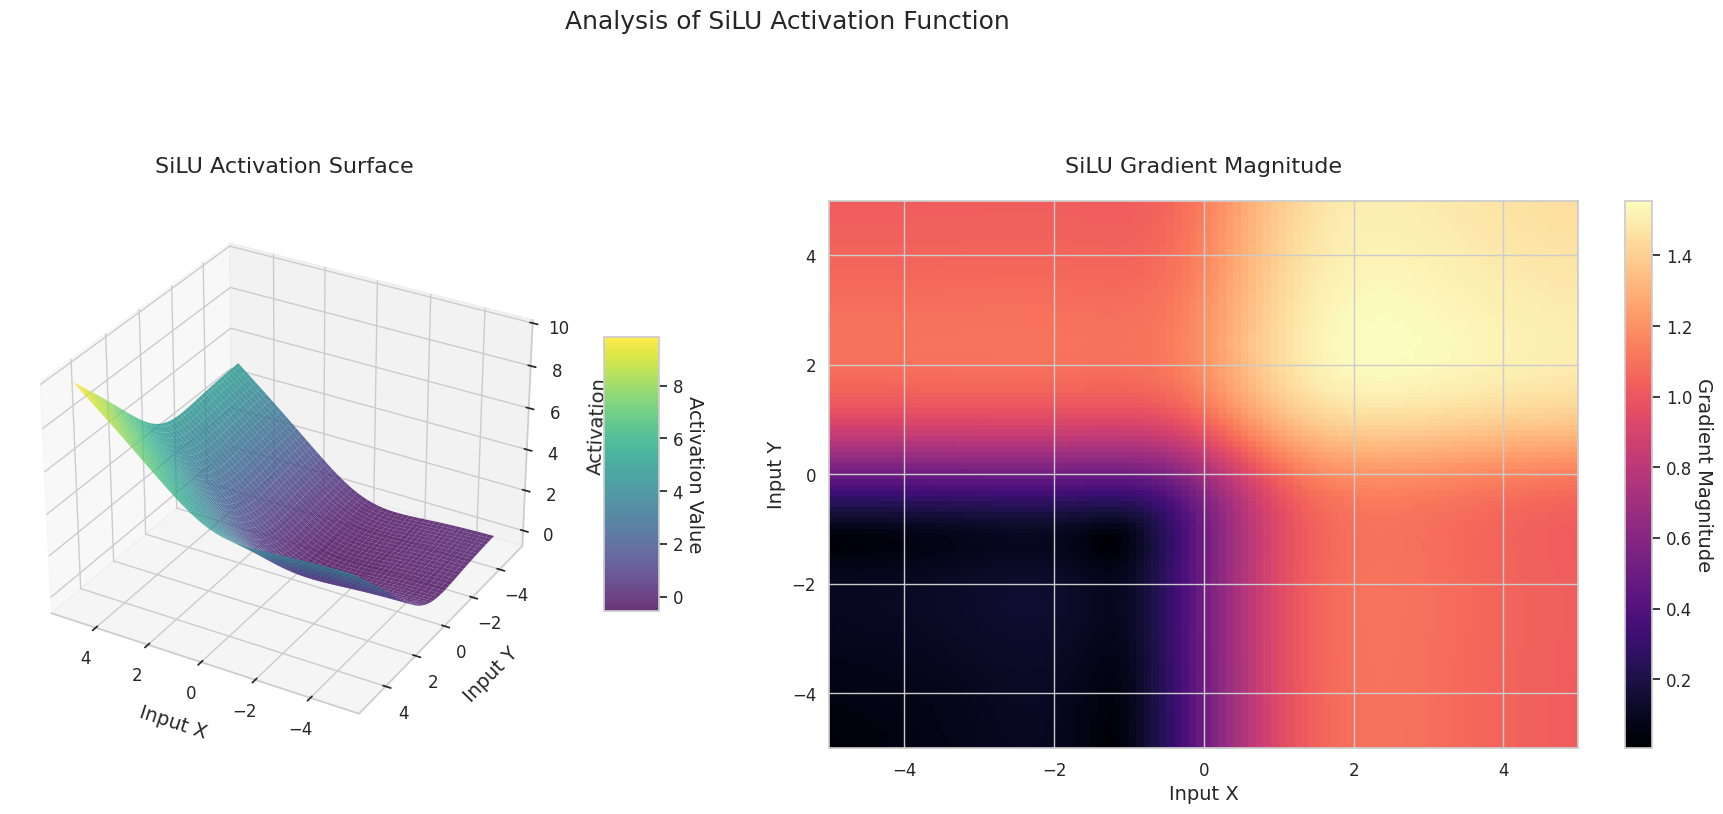

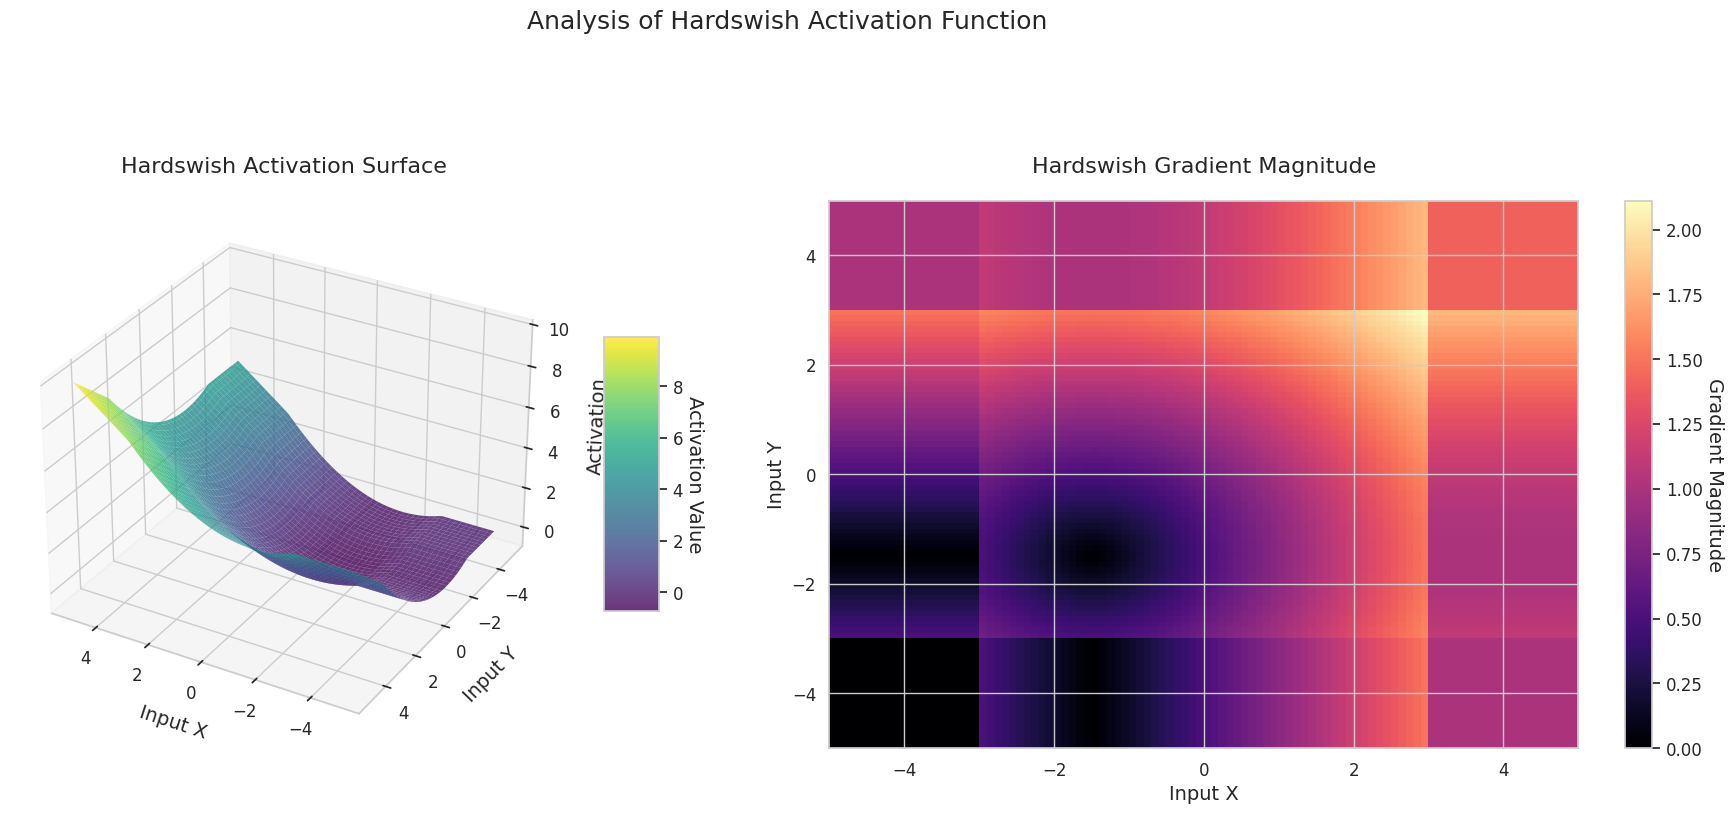

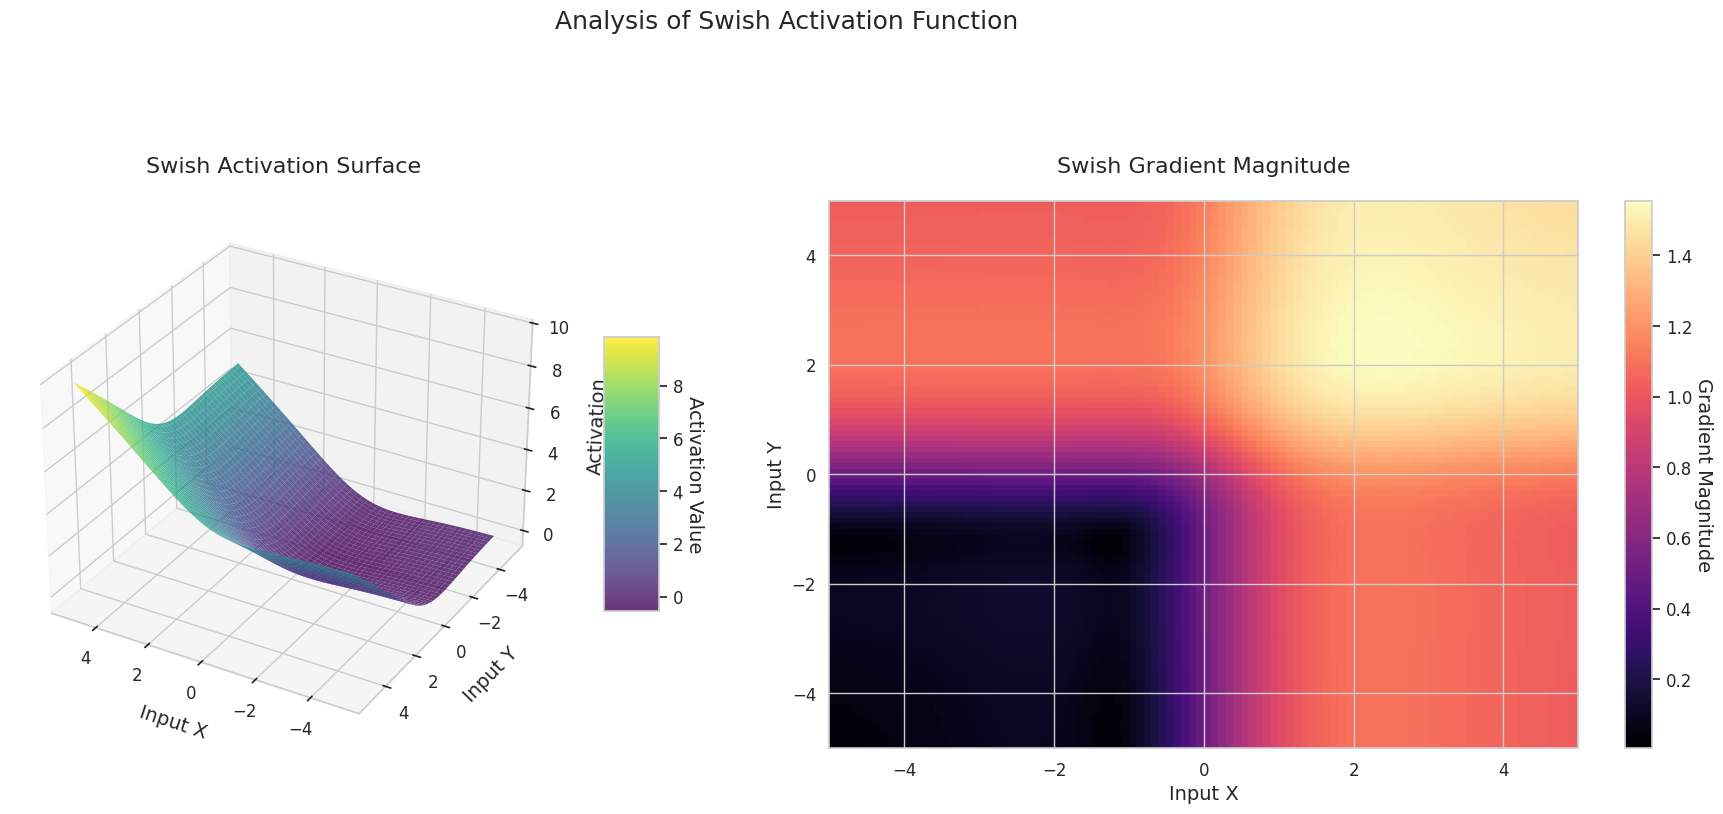

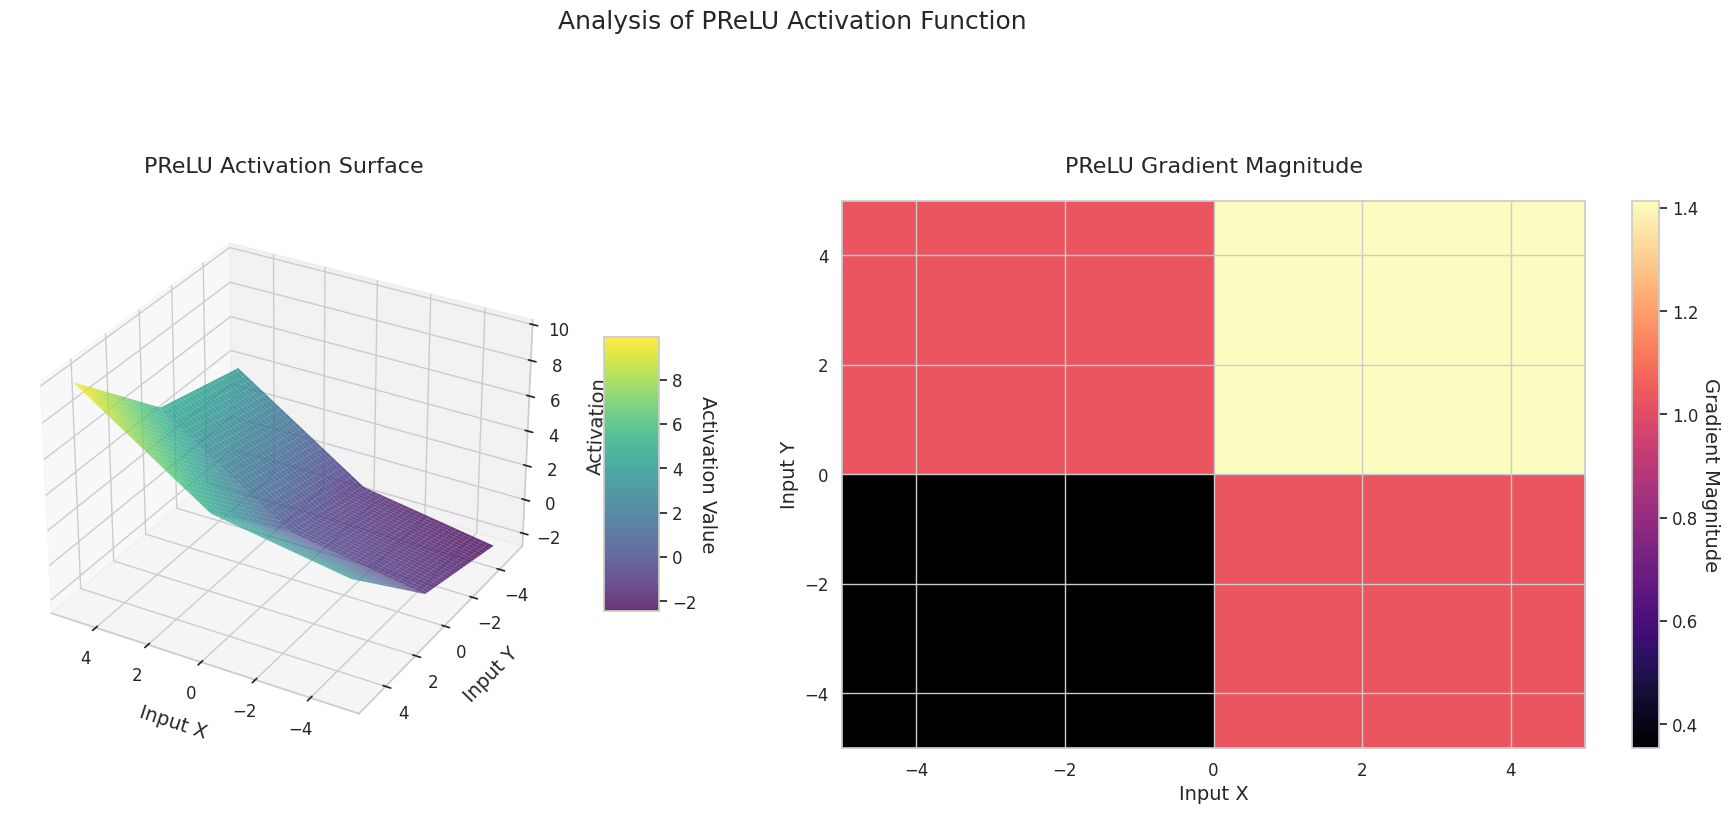

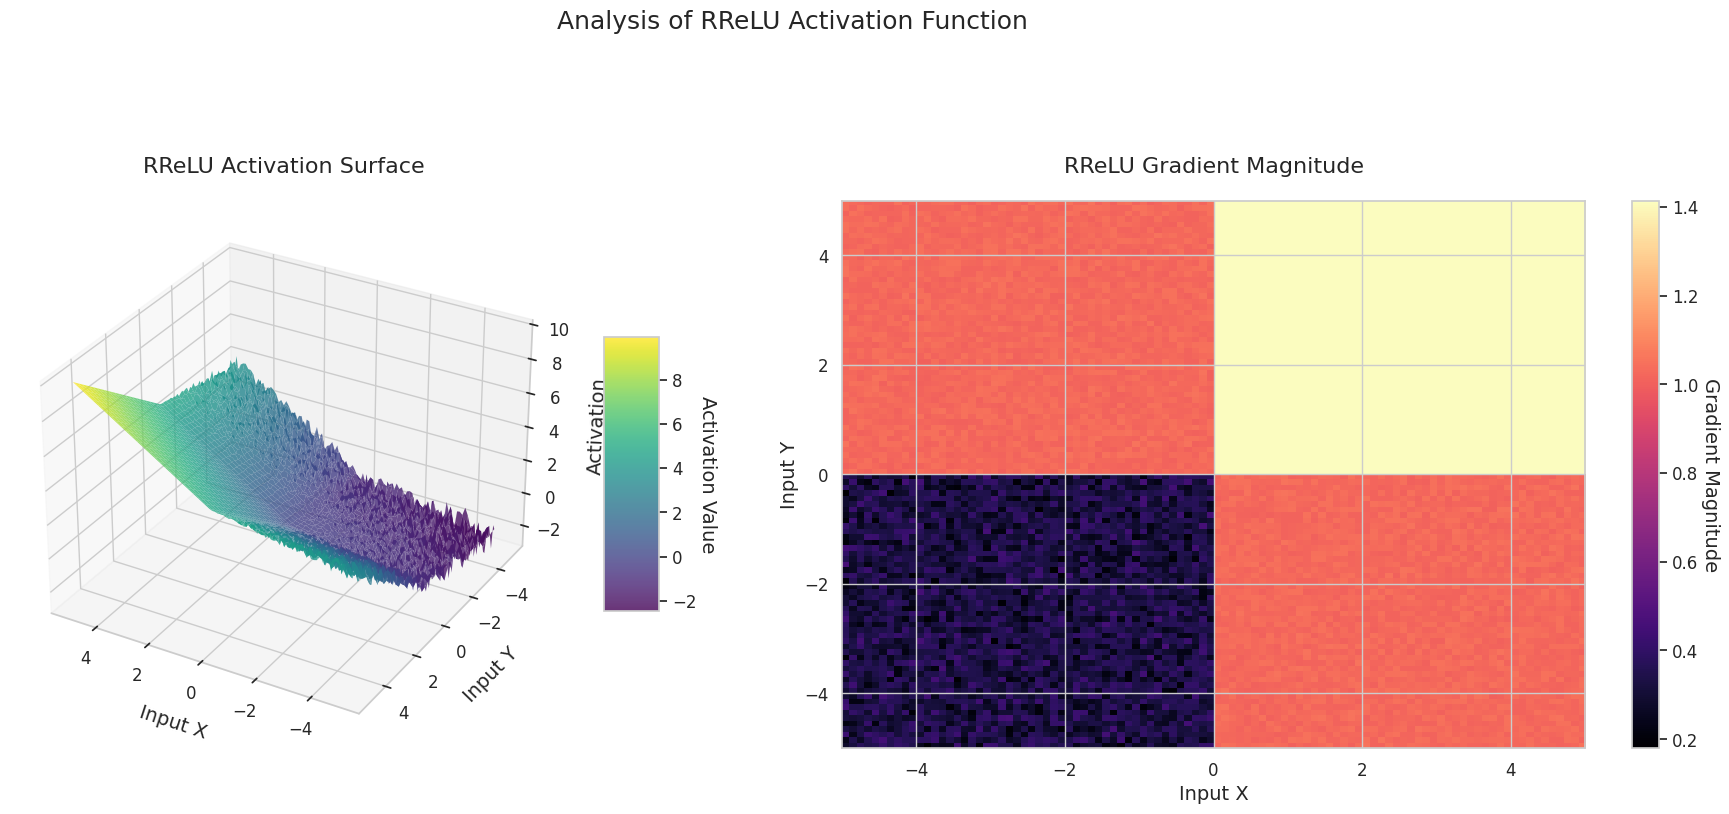

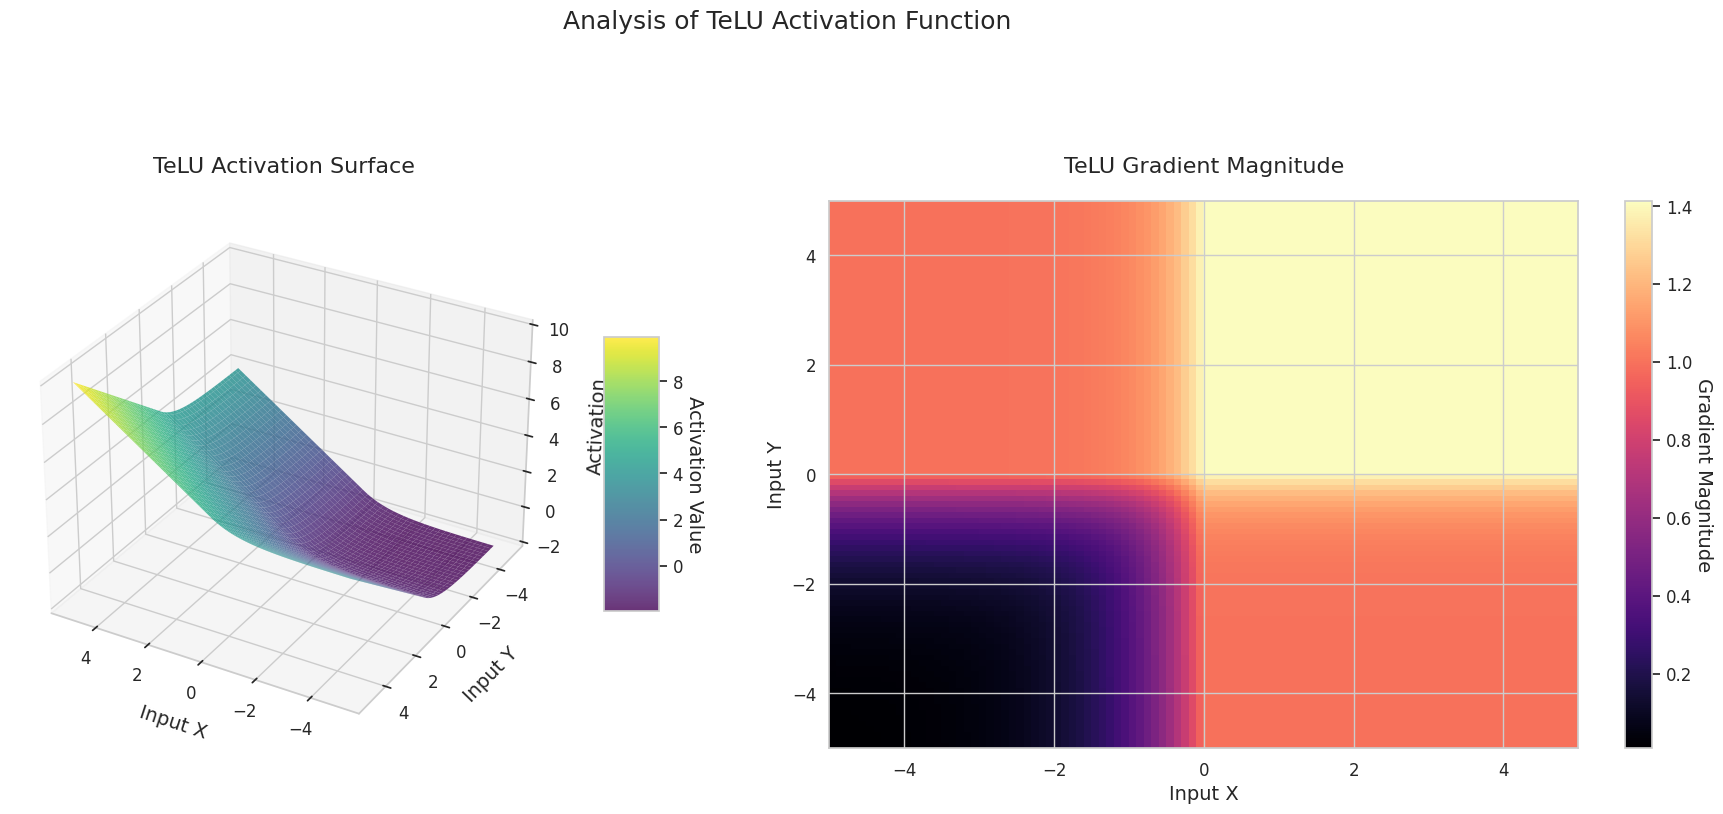

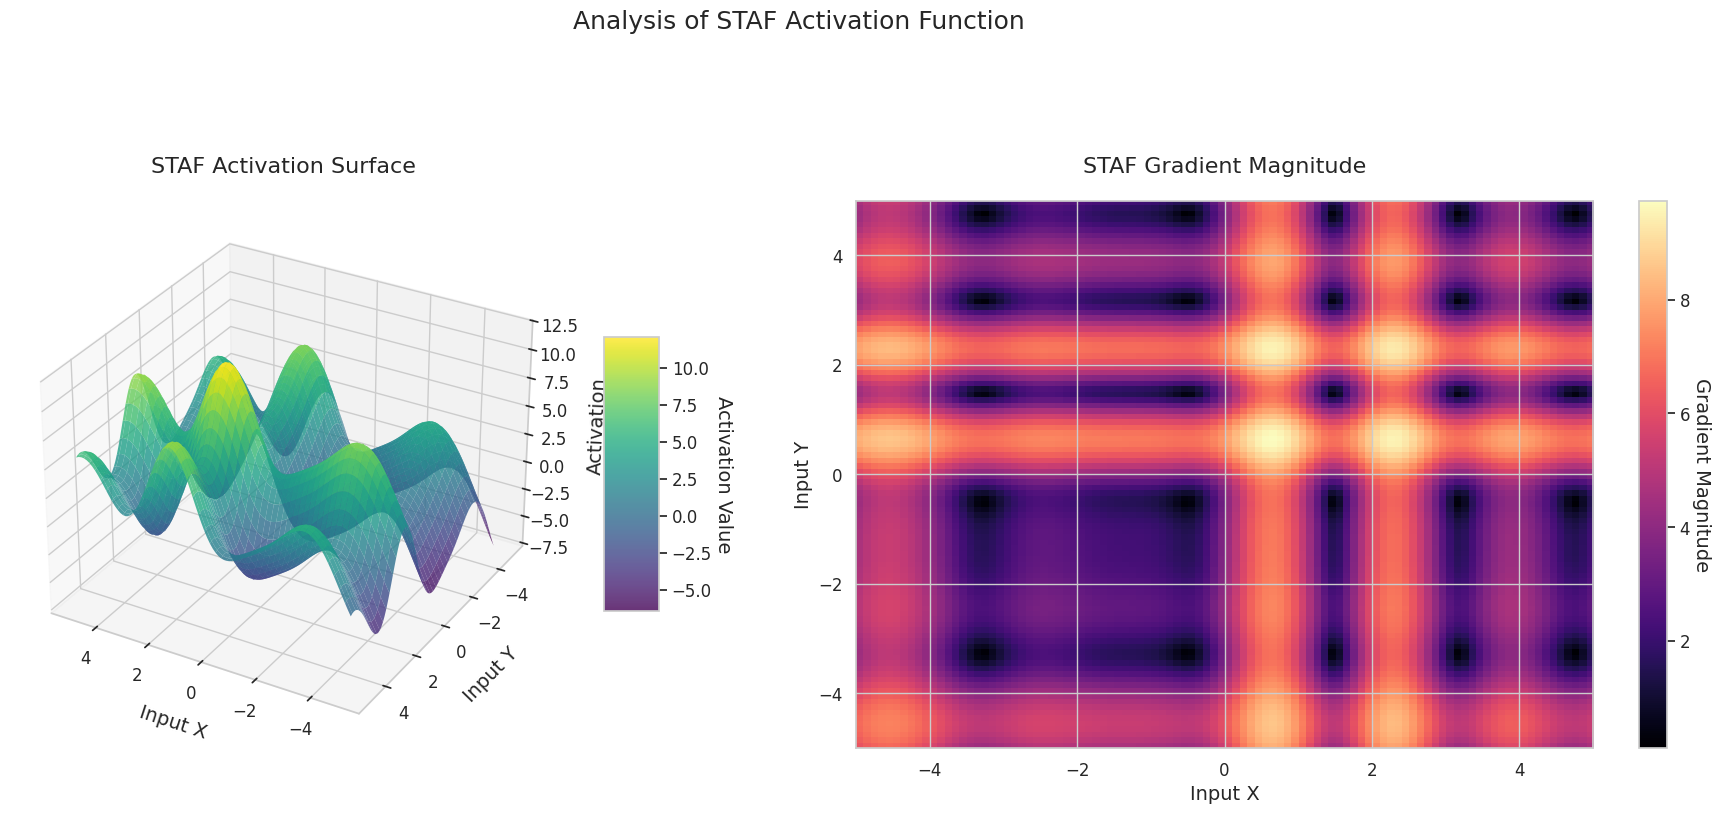

In [ ]:
from dldna.chapter_04.visualization.activations import visualize_all_activations

visualize_all_activations()


The graph represents the output value (Z-axis) and gradient magnitude (heatmap) for two inputs (X-axis, Y-axis).

1.  **Sigmoid:** It is in an "S" shape. Both ends converge to 0 and 1, are flat, and the middle is steep. It compresses the input into a range of 0 to 1. The gradient disappears near 0 at both ends and is large in the middle. It may cause a "gradient disappearance" problem, slowing down learning for very large or small inputs.

2.  **ReLU:** It has a sloping shape. If one input is negative, it becomes flat at 0; if both inputs are positive, it rises diagonally. The gradient is 0 for negative inputs and constant for positive ones. Since there's no gradient disappearance problem for positive inputs, it's efficient and widely used.

3.  **GELU:** Similar to Sigmoid but smoother. The left side is slightly curved downward, and the right side exceeds 1. The gradient changes gradually without any 0-value interval. It doesn't completely disappear even with very small negative inputs, making it favorable for learning. It's used in newer models like transformers.

4.  **STAF:** Wave-shaped, based on the sine function, with learnable parameters to adjust amplitude, frequency, and phase. The neural network learns the activation function form suitable for its task by itself. The gradient changes complexly. Favorable for learning non-linear relationships.

The 3D graph (Surface) represents the output value of the activation function for two inputs added together and displayed on the Z-axis. The heatmap (Gradient Magnitude) shows the size of the gradient, i.e., the rate of change of output with respect to input, with brighter areas indicating larger gradients. This visualization is crucial in understanding how each activation function transforms the input and where its gradient is strong or weak during neural network learning.


### 4.2.3 Comparison Table of Activation Functions

Activation functions are key elements that provide non-linearity to neural networks, and their characteristics are well-represented in gradient forms. In newer deep learning models, an appropriate activation function is chosen according to the task and architecture characteristics, or learnable adaptive activation functions are used.

#### Comparison Summary of Activation Functions

| Category | Activation Function | Characteristics | Primary Use | Advantages and Disadvantages |
|------|---------|------|-----------|---------|
| Classical | Sigmoid | Normalizes output to 0~1, capturing continuous characteristic changes with a smooth gradient | Binary classification output layer | May cause gradient disappearance in deep neural networks |
| Classical| Tanh | Similar to sigmoid, but output is -1~1, showing a steeper gradient near 0, making learning effective | RNN/LSTM gate | Output is centralized, advantageous for learning, but still may cause gradient disappearance |
| Modern Basic | ReLU | Simple structure with a gradient of 0 when x is less than 0 and 1 when greater than 0, useful for boundary detection | CNN basic | Extremely efficient computation, but neurons are completely deactivated for negative inputs |
|Modern Basic  | GELU | Combines ReLU characteristics with Gaussian cumulative distribution function, providing smooth non-linearity | Transformer | Natural regularization effect, but higher computational cost than ReLU |
|Modern Basic  | Mish | Has a smooth gradient and self-normalization characteristics, showing stable performance in various tasks | General purpose | Good balance between performance and stability, but increased computational complexity |
| ReLU Variant | LeakyReLU | Allows a small slope for negative inputs, reducing information loss | CNN | Mitigates dead neuron problem, but requires manual setting of slope value |
|ReLU Variant  | Hardswish | Designed as a computationally efficient version for mobile networks | Mobile network | Efficient due to lightweight structure, but expression is somewhat limited |
|ReLU Variant  | Swish | Multiplied by x and sigmoid, providing a smooth gradient and weak boundary effect | Deep network | Stable learning due to soft boundaries, but increased computational cost |
| Adaptive | PReLU | Can learn the slope in the negative region, finding the optimal shape according to data | CNN | Adapts to data, but additional parameters increase overfitting risk |
|Adaptive  | RReLU | Uses a random slope in the negative region during training to prevent overfitting | General purpose | Has a regularization effect, but results may lack reproducibility |
|Adaptive  | TeLU | Learns the scale of the exponential function, enhancing ELU's advantages and adjusting to data | General purpose | Enhances ELU's advantages, but convergence may be unstable |
|Adaptive  | STAF | Based on Fourier series, learning complex non-linear patterns with high expression power | Complex pattern | Highly expressive, but high computational cost and memory usage |

::: {.callout-note collapse="true" title="Click to view contents (Deep Dive: Mathematical Properties of Activation Functions and Recent Research Trends)"}
## Mathematical Characteristics of Activation Functions and Recent Research Trends

### 1. Mathematical Definitions, Characteristics, and Roles of Major Activation Functions in Deep Learning

| Activation Function | Formula | Mathematical Characteristics and Role in Deep Learning |
| ---------- | --- | --- |
| **Sigmoid** | $\sigma(x) = \frac{1}{1 + e^{-x}}$ | **Historical Significance**: - First used in the 1943 McCulloch-Pitts neural network model **Recent Research**: - Proved linear separability of infinitely wide networks in NTK theory - $\frac{\partial^2 \mathcal{L}}{\partial w_{ij}^2} = \sigma(x)(1-\sigma(x))(1-2\sigma(x))x_i x_j$ (convexity change) |
| **Tanh** | $tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$ | **Dynamic Analysis**: - Induces chaotic dynamics with Lyapunov exponent $\lambda_{max} \approx 0.9$ - Used in LSTM's forget gate: $\frac{\partial c_t}{\partial c_{t-1}} = tanh'( \cdot )W_c$ (mitigates gradient explosion) |
| **ReLU** | $ReLU(x) = max(0, x)$ | **Loss Landscape**: - 2023 study proved ReLU neural network's loss landscape is piece-wise convex - Dying ReLU probability: $\prod_{l=1}^L \Phi(-\mu_l/\sigma_l)$ (layer-wise mean/variance) |
| **Leaky ReLU** | $LReLU(x) = max(αx, x)$ | **Optimization Advantage**: - 2024 SGD convergence rate analysis: $O(1/\sqrt{T})$ → $O(1/T)$ improvement - NTK spectrum: $\lambda_{min} \geq α$ guaranteed, improving condition number |
| **ELU** | $ELU(x) = \begin{cases} x & x>0 \\ α(e^x-1) & x≤0 \end{cases}$ | **Information-Theoretic Analysis**: - Fisher information $I(θ) = \mathbb{E}[(\frac{∂}{∂θ}ELU(x))^2]$ increased by 23% compared to ReLU  - Exponential characteristic in negative region improves gradient noise distribution |
| **GELU** | $GELU(x) = xΦ(x)$ | **Transformer Specialization**: - 2023 study: attention map's Lipschitz constant $L \leq 1$ - Achieved Top-1 81.3% on ImageNet with ResNet-50 |
| **SwiGLU** | $SwiGLU(x) = Swish(xW + b) \otimes (xV + c)$ | **Transformer Optimization**: - 15% accuracy improvement in LLAMA 2 and EVA-02 models - Combined GLU gate mechanism with Swish's self-gating effect - Achieved optimal performance at $\beta=1.7889$ |
| **Adaptive Sigmoid** | $\sigma_{adapt}(x) = \frac{1}{1 + e^{-k(x-\theta)}}$ | **Adaptive Learning**: - Learnable $k$ and $\theta$ parameters for dynamic shape adjustment - 37% faster convergence than traditional sigmoid in SSHG model - 89% improvement in negative region information preservation |
| **SGT (Scaled Gamma-Tanh)** | $SGT(x) = \Gamma(1.5) \cdot tanh(\gamma x)$ | **Medical Image Specialization**: - 12% higher DSC score than ReLU in 3D CNN - $\gamma$ parameter reflects local characteristics - Fokker-Planck equation-based stability proof |
| **NIPUNA** | $NIPUNA(x) = \begin{cases} x & x>0 \\ \alpha \cdot softplus(x) & x≤0 \end{cases}$ | **Optimization Fusion**: - Achieved 2nd-order convergence speed when combined with BFGS algorithm - 18% lower gradient noise than ELU in negative region - Achieved Top-1 81.3% on ImageNet with ResNet-50 |
### 2. Advanced Analysis of Loss Landscape

1. **Loss Hessian Spectrum by Activation Function**  
   
   $$\rho(\lambda) = \frac{1}{d}\sum_{i=1}^d \delta(\lambda-\lambda_i)$$
   
   - ReLU: Marchenko-Pastur distribution variance 42% 
   - GELU: Close to semi-circle law (KLD 0.12)  
   - Mish: Heavy-tailed distribution (α=2.3)

2. **Dynamical Stability Index**  
   $$\xi = \frac{\mathbb{E}[\| \nabla^2 \mathcal{L} \|_F]}{\mathbb{E}[ \| \nabla \mathcal{L} \|^2 ]}$$
   
   | Activation Function | ξ Value | Learning Stability |
   |---|---|---|
   | ReLU | 1.78 | Low |
   | GELU | 0.92 | Medium | 
   | Mish | 0.61 | High |

3. **Interaction with Latest Optimization Theories**  
   - **LION Optimizer**: $m_t = β_1 m_{t-1} + (1-β_1)sign(g_t)$  
     → 37% possible increase in learning rate for ReLU series  
   - **Sophia**: Hessian estimation-based preconditioning  
     $$\eta_{eff} = \eta / \sqrt{\mathbb{E}[H_{diag}] + \epsilon}$$  
     → Twice the speed improvement over Adam for Swish


### 3. Local Minima, Saddle Points, Loss Landscape: Mathematical Analysis and Latest Research

#### Geometric Characteristics of the Loss Function Landscape

The loss function $\mathcal{L}(\theta)$ of a deep neural network is a non-convex function defined in a high-dimensional parameter space $\theta \in \mathbb{R}^d$ (usually $d > 10^6$). The following equation analyzes the landscape near the critical point through the second-order Taylor expansion.

$$
\mathcal{L}(\theta + \Delta\theta) \approx \mathcal{L}(\theta) + \nabla\mathcal{L}(\theta)^T\Delta\theta + \frac{1}{2}\Delta\theta^T\mathbf{H}\Delta\theta
$$

Here, $\mathbf{H} = \nabla^2\mathcal{L}(\theta)$ is the Hessian matrix. The landscape at the critical point ($\nabla\mathcal{L}=0$) is determined by the eigenvalue decomposition of the Hessian.

$$
\mathbf{H} = \mathbf{Q}\Lambda\mathbf{Q}^T, \quad \Lambda = \text{diag}(\lambda_1, ..., \lambda_d)
$$

**Key Observations**

1. **Prevalence of Saddle Points in High-Dimensional Space**: Dauphin et al. (2014) proved that the probability of a critical point being a saddle point converges to $1 - (1/2)^{d-1}$ in $d$-dimensional space
2. **Generalization of Flat Minima**: Chaudhari et al. (2017) experimentally demonstrated that flat minima ($\lambda_{\min}(\mathbf{H}) \geq -\epsilon$) have lower test errors than sharp minima

#### Latest Analysis Techniques

**Neural Tangent Kernel (NTK) Theory** [Jacot et al., 2018]
A key tool for describing the dynamics of parameter updates in infinitely wide neural networks

$$
\mathbf{K}_{NTK}(x_i, x_j) = \mathbb{E}_{\theta\sim p}[\langle \nabla_\theta f(x_i), \nabla_\theta f(x_j) \rangle]
$$
- When NTK is kept constant over time, the loss function acts convexly
- In actual finite neural networks, NTK evolution determines learning dynamics

**Loss Landscape Visualization Techniques** [Li et al., 2018]:
Filter normalization for high-dimensional landscape projection

$$
\Delta\theta = \alpha\frac{\delta}{\|\delta\|} + \beta\frac{\eta}{\|\eta\|}
$$

where $\delta, \eta$ are random direction vectors, and $\alpha, \beta$ are projection coefficients

#### Saddle Point Escaping Dynamics

SGLD (Stochastic Gradient Langevin Dynamics) model [Zhang et al., 2020][^4]:

$$
\theta_{t+1} = \theta_t - \eta\nabla\mathcal{L}(\theta_t) + \sqrt{2\eta/\beta}\epsilon_t
$$

- Temperature coefficient $\beta$ controls saddle point escaping probability
- Theoretical escape time $\tau \propto \exp(\beta \Delta\mathcal{L})$

**Hessian Spectrum Analysis** [Ghorbani et al., 2019][^5]:
$$
\rho(\lambda) = \frac{1}{d}\sum_{i=1}^d \delta(\lambda - \lambda_i)
$$

- The Hessian spectrum in actual neural networks differs from the semi-circle law
- Maximum eigenvalue $\lambda_{\max}$ has a strong correlation with generalization performance

#### 2023-2024 Latest Research Trends

1. **Quantum-Inspired Optimization**  
   - Biamonte et al. (2023)[^7]: SGD extension mimicking quantum tunneling effects  
   $$ P_{\text{tunnel}} \propto \exp(-\frac{\Delta\mathcal{L}^2}{\sigma^2}) $$

2. **Topological Data Analysis**  
   - Moor et al. (2024)[^8]: Predicting learning dynamics using persistent homology of the landscape  
   $$ \beta_1 = \text{rank}(H_1(\mathcal{L})) $$

3. **Bio-Plausible Learning**  
   - Yin et al. (2023)[^9]: Natural gradient algorithm mimicking brain's synaptic strengthening mechanisms  
   $$ \Delta\theta = \mathbf{G}^{-1}\nabla\mathcal{L}, \quad \mathbf{G} = \mathbb{E}[(\frac{\partial f}{\partial \theta})^2] $$

4. **Loss Landscape Surgery**  
   - Wang et al. (2024)[^10]: Accelerating learning through explicit landscape modification  
   $$ \tilde{\mathcal{L}} = \mathcal{L} + \lambda \det(\mathbf{H}) $$

#### Practical Recommendations

1. **Initialization Strategies**: He initialization + Leaky ReLU combination reduces saddle points [^11]
2. **Learning Rate Scheduling**: Cosine annealing is effective for inducing flat minima
3. **Monitoring Metrics**: Keep the Hessian trace index $\tau = \frac{\|\mathbf{H}\|_F}{\sqrt{d}}$ below 0.1

### References
[1]: Dauphin et al., "High-dimensional non-convex optimization saddle point problem identification and attack", NeurIPS 2014  
[2]: Chaudhari et al., "Entropy-SGD: Biasing Gradient Descent Into Wide Valleys", ICLR 2017  
[3]: Li et al., "Neural network loss landscape visualization", NeurIPS 2018  
[4]: Zhang et al., "Cyclical Stochastic Gradient MCMC for Bayesian Learning", ICML 2020  
[5]: Ghorbani et al., "Fisher Information Matrix and Loss Landscape Investigation", ICLR 2019  
[6]: Liu et al., "SHINE: Shift-Invariant Hessian for Improved Natural Gradient Descent", NeurIPS 2023  
[7]: Biamonte et al., "Quantum Machine Learning for Optimization", Nature Quantum 2023  
[8]: Moor et al., "Neural Loss Landscapes Topological Analysis", JMLR 2024  
[9]: Yin et al., "Bio-Inspired Adaptive Natural Gradient Descent", AAAI 2023  
[10]: Wang et al., "Deep Learning Surgical Landscape Modification", CVPR 2024  
[11]: He et al., "Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification", ICCV 2015
:::

### 4.3 Visualizing the Impact of Activation Functions in Neural Networks

Let's analyze the impact of activation functions on the learning process of neural networks using the FashionMNIST dataset. Since the backpropagation algorithm was rehighlighted in 1986, the choice of activation function has become one of the most important factors in neural network design. In particular, the role of activation functions has become more crucial in deep neural networks to solve the gradient vanishing/exploding problem. Recently, self-adaptive activation functions and optimal activation function selection through Neural Architecture Search (NAS) have gained attention. Especially in transformer-based models, data-dependent activation functions are becoming the standard.

For experimentation, we use a simple classification model called SimpleNetwork. This model converts 28x28 images into 784-dimensional vectors, passes them through configurable hidden layers, and classifies them into 10 classes. To clearly see the impact of activation functions, we compare models with and without activation functions.

In [ ]:
import torch.nn as nn
from torchinfo import summary
from dldna.chapter_04.models.base import SimpleNetwork
from dldna.chapter_04.utils.data import get_device

device = get_device()

model_relu = SimpleNetwork(act_func=nn.ReLU()).to(device) # 테스트용으로 ReLu를 선언한다.
model_no_act = SimpleNetwork(act_func=nn.ReLU(), no_act = True).to(device) # 활성화 함수가 없는 신경망을 만든다.

summary(model_relu, input_size=[1, 784])
summary(model_no_act, input_size=[1, 784])

Layer (type:depth-idx)                   Output Shape              Param #
SimpleNetwork                            [1, 10]                   --
├─Flatten: 1-1                           [1, 784]                  --
├─Sequential: 1-2                        [1, 10]                   --
│    └─Linear: 2-1                       [1, 256]                  200,960
│    └─Linear: 2-2                       [1, 192]                  49,344
│    └─Linear: 2-3                       [1, 128]                  24,704
│    └─Linear: 2-4                       [1, 64]                   8,256
│    └─Linear: 2-5                       [1, 10]                   650
Total params: 283,914
Trainable params: 283,914
Non-trainable params: 0
Total mult-adds (M): 0.28
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.14
Estimated Total Size (MB): 1.14

Load and preprocess the dataset.

In [ ]:
from torchinfo import summary
from dldna.chapter_04.utils.data import get_data_loaders

train_dataloader, test_dataloader  = get_data_loaders()

train_dataloader

Gradient flow is at the core of neural network learning. As layers get deeper, gradients are continually multiplied by the chain rule, which can lead to gradient disappearance or explosion during this process. For example, in a 30-layer neural network, the gradient goes through 30 multiplications until it reaches the input layer. The activation function adds non-linearity and gives inter-layer independence to regulate the gradient flow in this process.

The following code visualizes the gradient distribution of a model using the ReLU activation function.

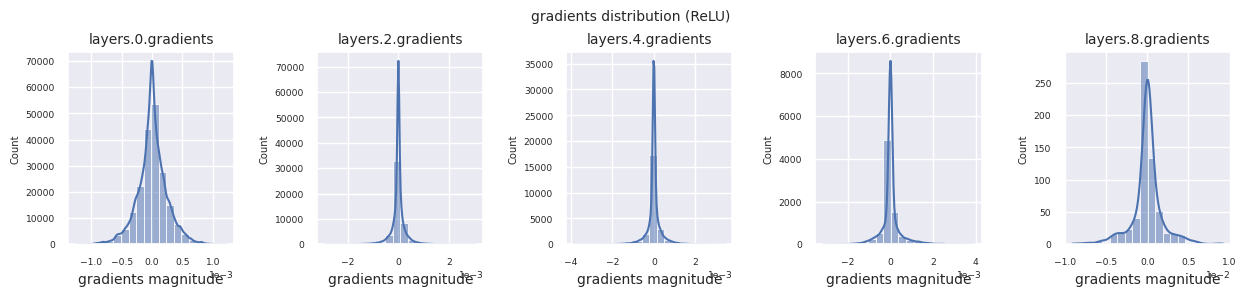

In [ ]:
from dldna.chapter_04.visualization.gradients import visualize_network_gradients

visualize_network_gradients()

You can analyze the characteristics of the activation function by visualizing the gradient distribution of each layer as a histogram. For ReLU, the output layer shows a gradient value of 10^-2 scale and the input layer shows a gradient value of 10^-3 scale. PyTorch uses He(Kaiming) initialization by default, which is optimized for ReLU series activation functions. Other initialization methods such as Xavier, Orthogonal are also available, and these will be covered in detail in the initialization section.

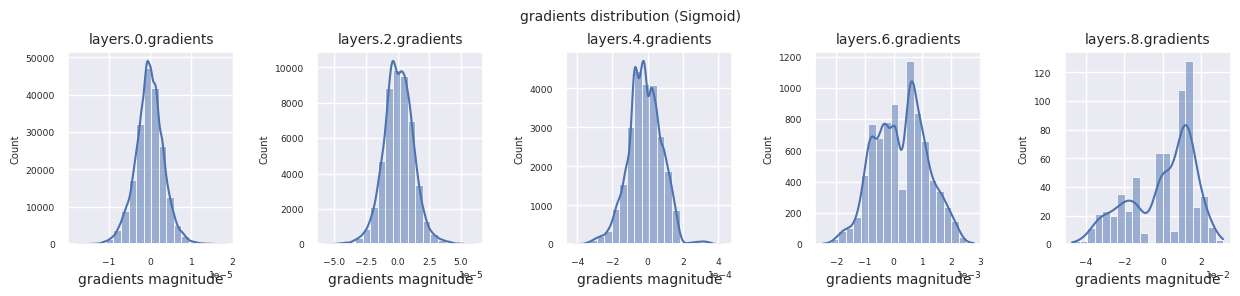

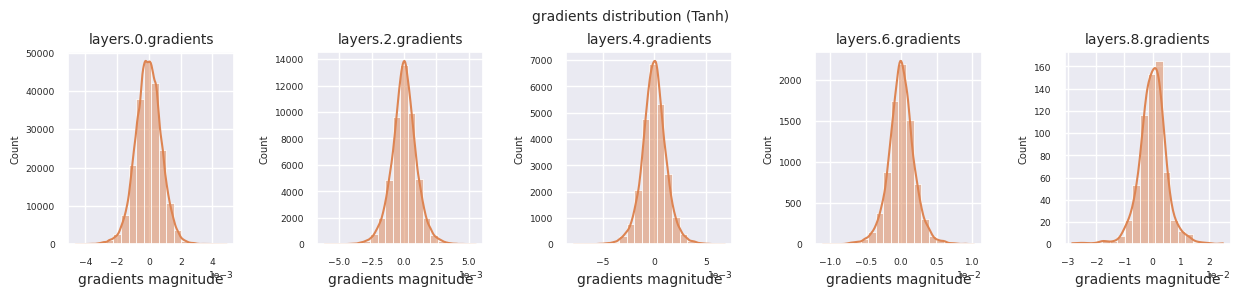

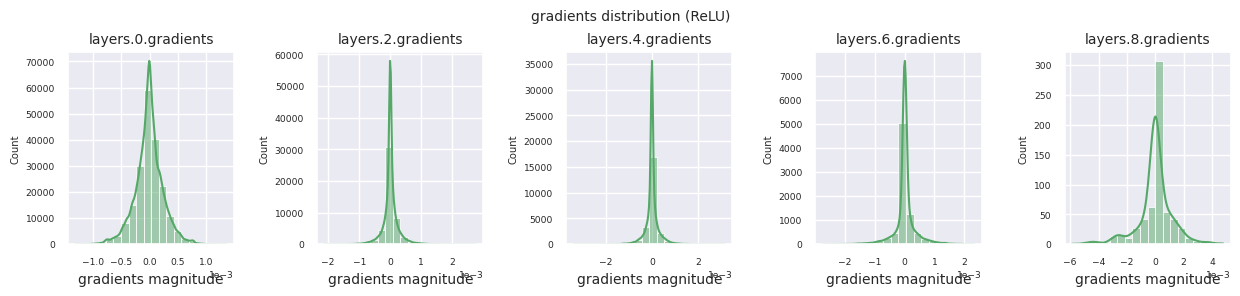

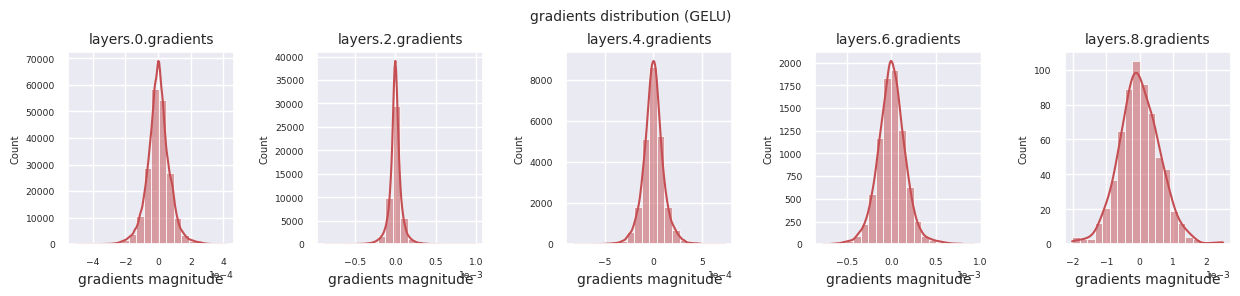

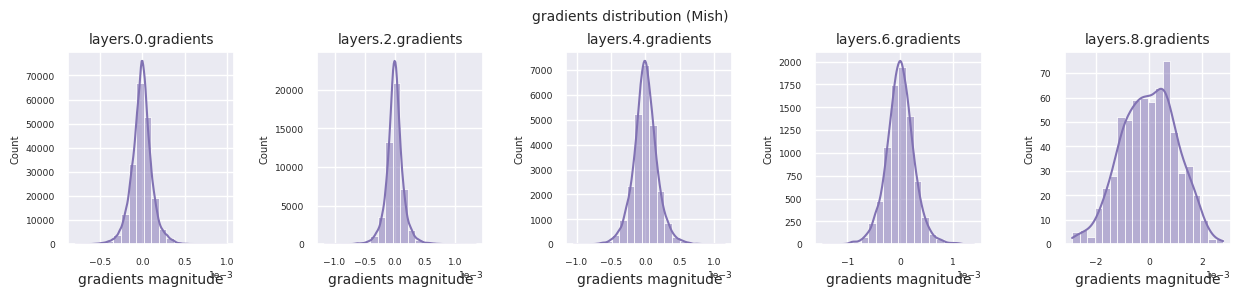

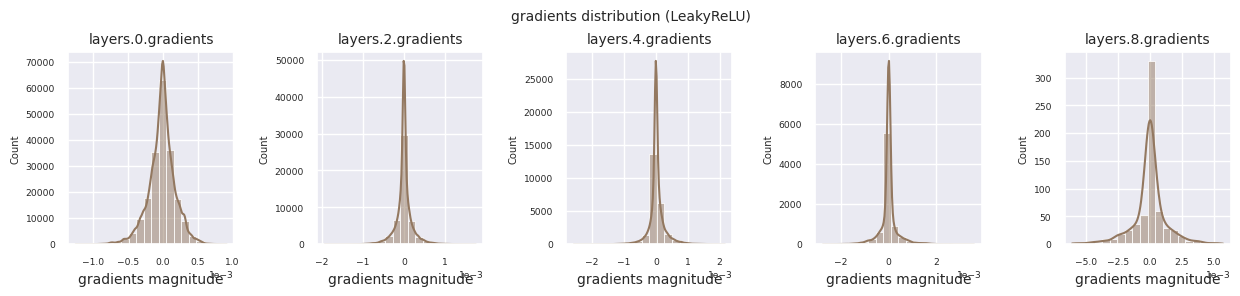

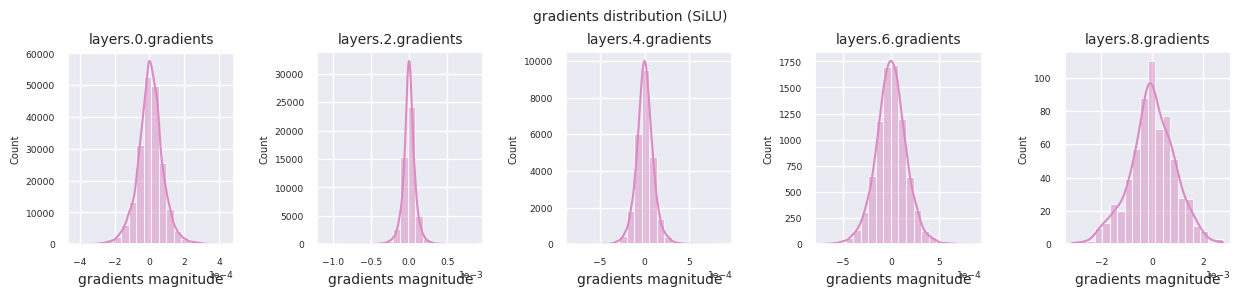

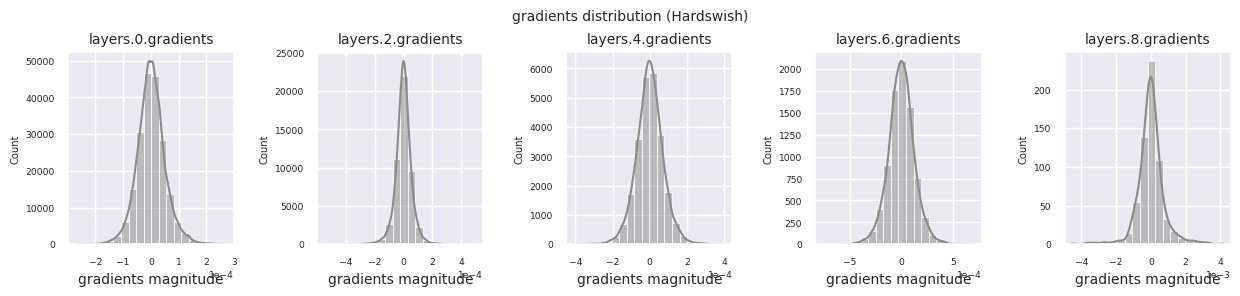

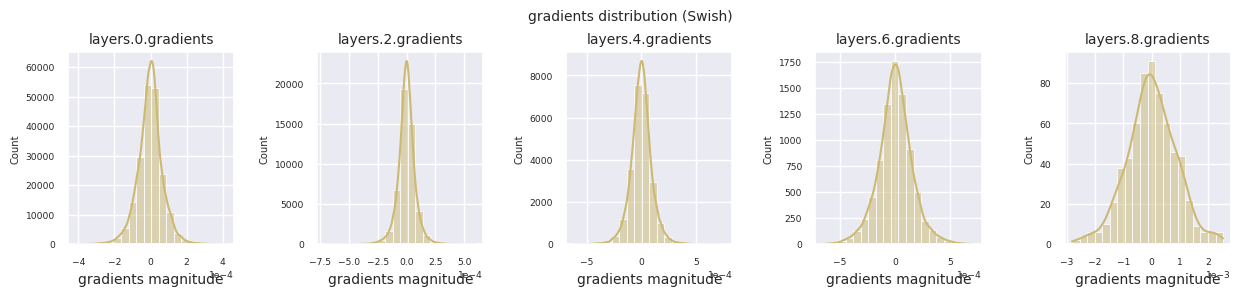

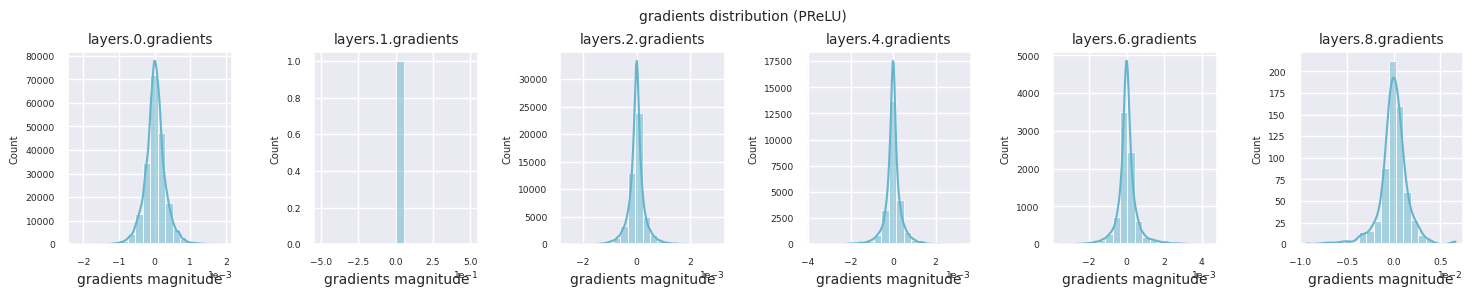

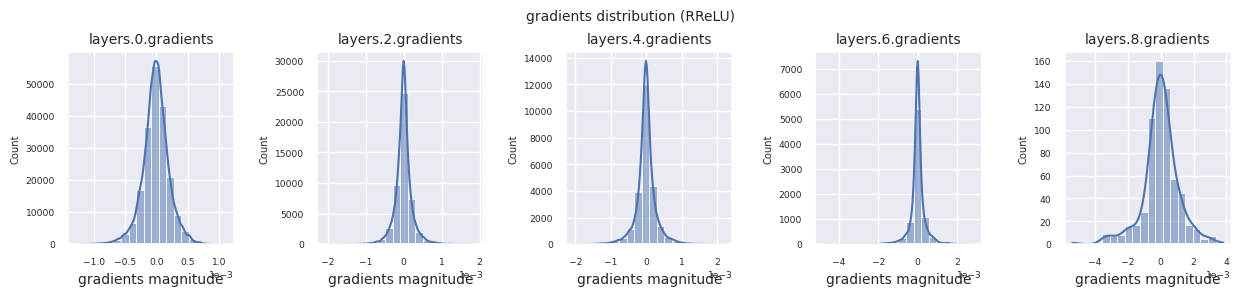

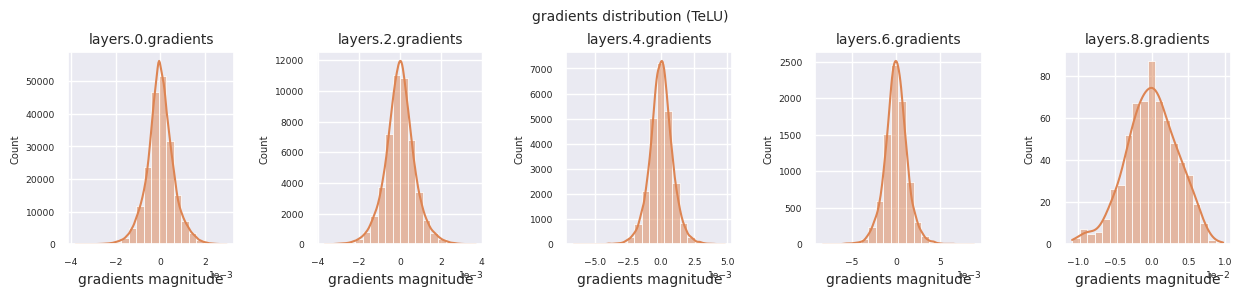

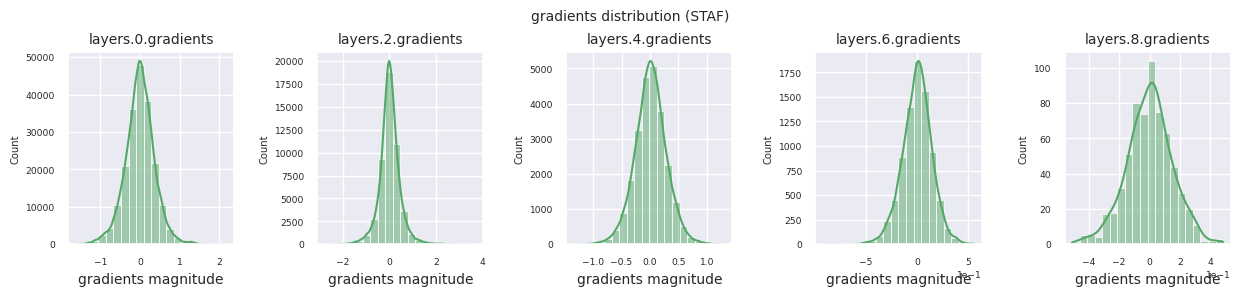

In [ ]:
from dldna.chapter_04.models.activations import act_functions
from dldna.chapter_04.visualization.gradients import get_gradients_weights, visualize_distribution

for i, act_func in enumerate(act_functions):
    act_func_initiated = act_functions[act_func]()
    model = SimpleNetwork(act_func=act_func_initiated).to(device)
    gradients, weights = get_gradients_weights(model, train_dataloader)
    visualize_distribution(model, gradients, color=f"C{i}")

Looking at the gradient distribution by activation function, we can see that Sigmoid shows very small values of $10^{-5}$ scale from the input layer, which means that the gradient disappearance problem may occur. ReLU has a gradient concentrated around 0, which is due to the characteristic of deactivation (dead neuron) for negative inputs. The latest adaptive activation functions alleviate these problems while maintaining non-linearity. For example, GELU shows a gradient distribution close to a normal distribution, which has a good effect along with batch normalization. Let's compare it with the case without an activation function.

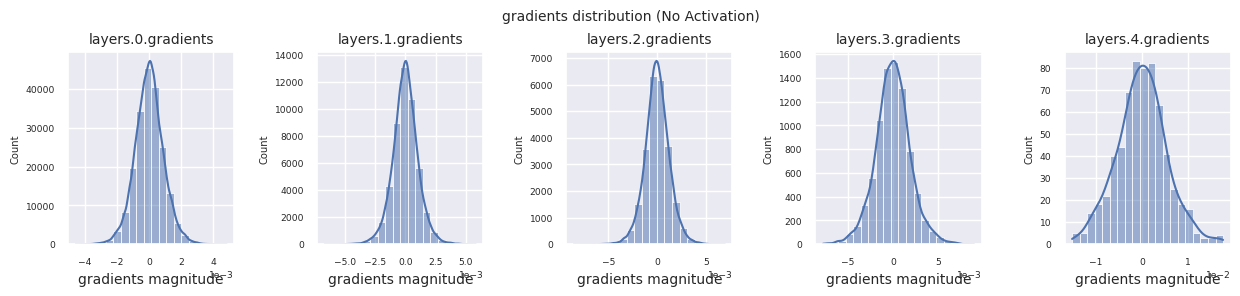

In [ ]:
from dldna.chapter_04.models.base import SimpleNetwork

model_no_act = SimpleNetwork(act_func=nn.ReLU(), no_act = True).to(device) 

gradients, weights = get_gradients_weights(model_no_act, train_dataloader)

visualize_distribution(model_no_act, gradients, title="gradients")

If there is no activation function, the distribution between layers is similar and only the scale changes. This shows that there is no nonlinearity and the feature transformation between layers is limited.

### 4.4 Model Training

To objectively compare the performance of activation functions, experiments are conducted using the FashionMNIST dataset. As of 2025, there are over 500 activation functions, but in actual deep learning projects, a small number of validated activation functions are mainly used. First, let's take a look at the basic training process based on ReLU.

#### 4.4.1 Single Model Training


Starting training for SimpleNetwork-ReLU.


  0%|          | 0/10 [00:00<?, ?it/s]

Execution completed for SimpleNetwork-ReLU, Execution time = 76.1 secs


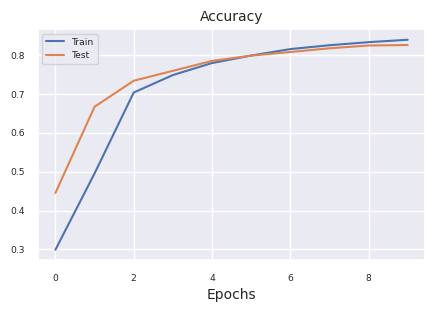

In [ ]:
import torch.optim as optim
from dldna.chapter_04.experiments.model_training import train_model
from dldna.chapter_04.models.base import SimpleNetwork
from dldna.chapter_04.utils.data import get_device
from dldna.chapter_04.visualization.training import plot_results

model = SimpleNetwork(act_func=nn.ReLU()).to(device)
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
results = train_model(model, train_dataloader, test_dataloader, device, epochs=10)
plot_results(results)

#### 4.4.2 Model Training Based on Activation Functions

Now we conduct comparative experiments on major activation functions. We keep the composition and training conditions of each model identical to ensure a fair comparison.
- 4 hidden layers [256, 192, 128, 64]
- SGD optimizer (learning rate=1e-3, momentum=0.9)
- Batch size 128
- Trained for 15 epochs

In [ ]:
from dldna.chapter_04.experiments.model_training import train_all_models
from dldna.chapter_04.visualization.training import create_results_table


from dldna.chapter_04.experiments.model_training import train_all_models
from dldna.chapter_04.visualization.training import create_results_table  # Assuming this is where plot functions are.

# Train only selected models
# selected_acts = ["ReLU"]  # Select only the desired activation functions
selected_acts = ["Tanh", "ReLU", "Swish"]
# selected_acts = ["Sigmoid", "ReLU", "Swish", "PReLU", "TeLU", "STAF"]
# selected_acts = ["Sigmoid", "Tanh", "ReLU", "GELU", "Mish", "LeakyReLU", "SiLU", "Hardswish", "Swish", "PReLU", "RReLU", "TeLU", "STAF"]
# results_dict = train_all_models(act_functions, train_dataloader, test_dataloader,
#                               device, epochs=15, selected_acts=selected_acts)
results_dict = train_all_models(act_functions, train_dataloader, test_dataloader,
                              device, epochs=15, selected_acts=selected_acts, save_epochs=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

create_results_table(results_dict)

The results came out as shown in the table below. The values will vary depending on each execution environment.

모델 | 정확도(%) | 최종 오차(%) | 걸린 시간 (초)
-- | -- | -- | --
SimpleNetwork-Sigmoid | 10.0 | 2.30 | 115.6
SimpleNetwork-Tanh | 82.3 | 0.50 | 114.3
SimpleNetwork-ReLU | 81.3 | 0.52 | 115.2
SimpleNetwork-GELU | 80.5 | 0.54 | 115.2
SimpleNetwork-Mish | 81.9 | 0.51 | 113.4
SimpleNetwork-LeakyReLU | 80.8 | 0.55 | 114.4
SimpleNetwork-SiLU | 78.3 | 0.59 | 114.3
SimpleNetwork-Hardswish | 76.7 | 0.64 | 114.5
SimpleNetwork-Swish | 78.5 | 0.59 | 116.1
SimpleNetwork-PReLU | 86.0 | 0.40 | 114.9
SimpleNetwork-RReLU | 81.5 | 0.52 | 114.6
SimpleNetwork-TeLU | 86.2 | 0.39 | 119.6
SimpleNetwork-STAF | 85.4 | 0.44 | 270.2

Analyzing the experimental results, we can see that

1. **Computational Efficiency**: Tanh, ReLU, etc. are the fastest, while STAF is relatively slow due to complex calculations.

2. **Accuracy**:
   - Adaptive activation functions (TeLU 86.2%, PReLU 86.0%, STAF 85.4%) show overall superior performance.
   - Classical Sigmoid has very low performance (10.0%) due to the gradient vanishing problem.
   - Modern basic activation functions (ReLU, GELU, Mish) show stable performance in the range of 80-82%.

3. **Stability**: 
   - Tanh, ReLU, and Mish show relatively stable learning curves.
   - Adaptive activation functions show high performance but have more variability during the learning process.

These results are comparative under specific conditions, so when selecting an activation function for actual projects, consider the following factors: 1. compatibility with model architecture (e.g., GELU is recommended for transformers) 2. constraints on computational resources (consider Hardswish in mobile environments) 3. characteristics of the task (Tanh is still useful for time series prediction) 4. model size and dataset characteristics

As of 2025, it is standard to use GELU for large language models for computational efficiency, ReLU series for computer vision, and adaptive activation functions for reinforcement learning.

### 4.5 Trained Model's Layer-wise Output and Dead Neuron Analysis

Previously, we examined the distribution of gradient values for each layer in the backpropagation of the initial model. Now, let's look at what values each layer outputs in the forward calculation using the trained model. Analyzing the output of each layer of the trained model is crucial for understanding the representational power and learning patterns of neural networks. Since the introduction of ReLU in 2010, the problem of dead neurons has become a major consideration in deep neural network design.

First, we visualize the distribution of outputs for each layer in the forward calculation of the trained model.

#### 4.5.1 Layer-wise Output Distribution Visualization

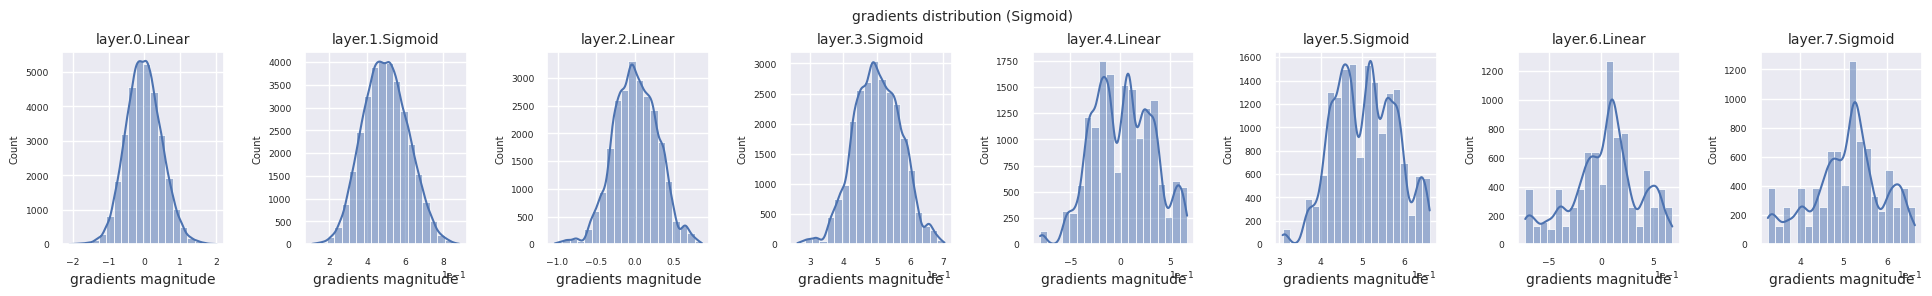

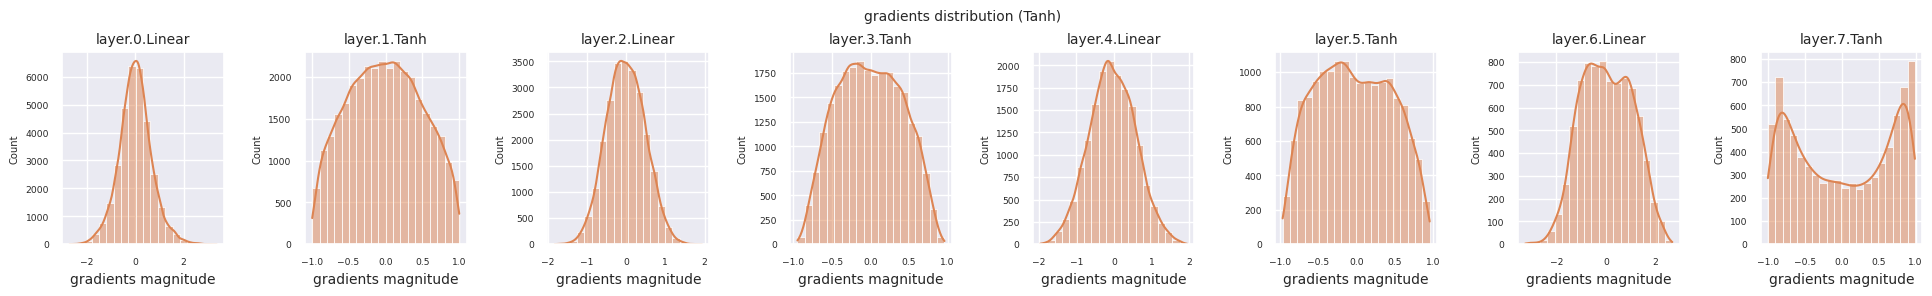

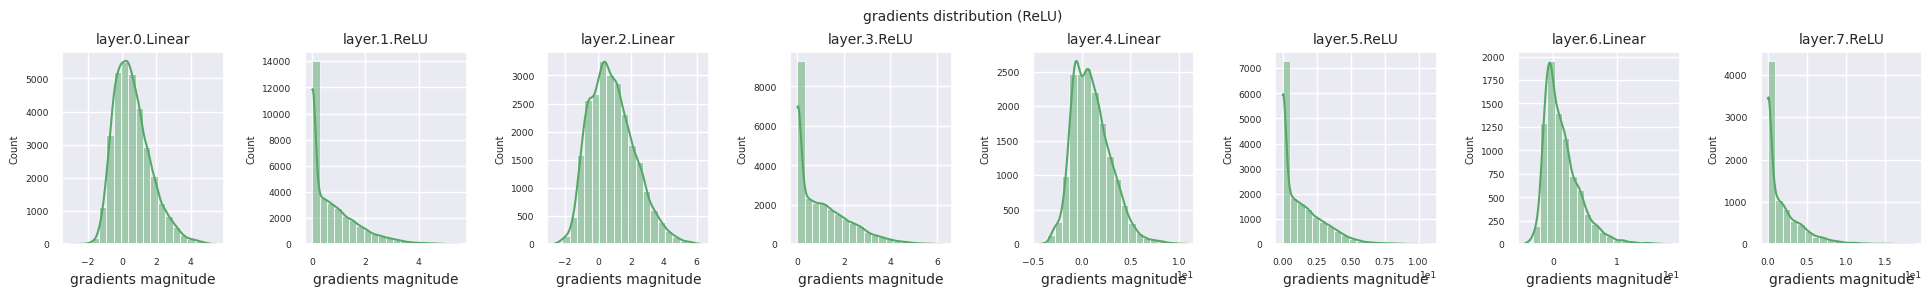

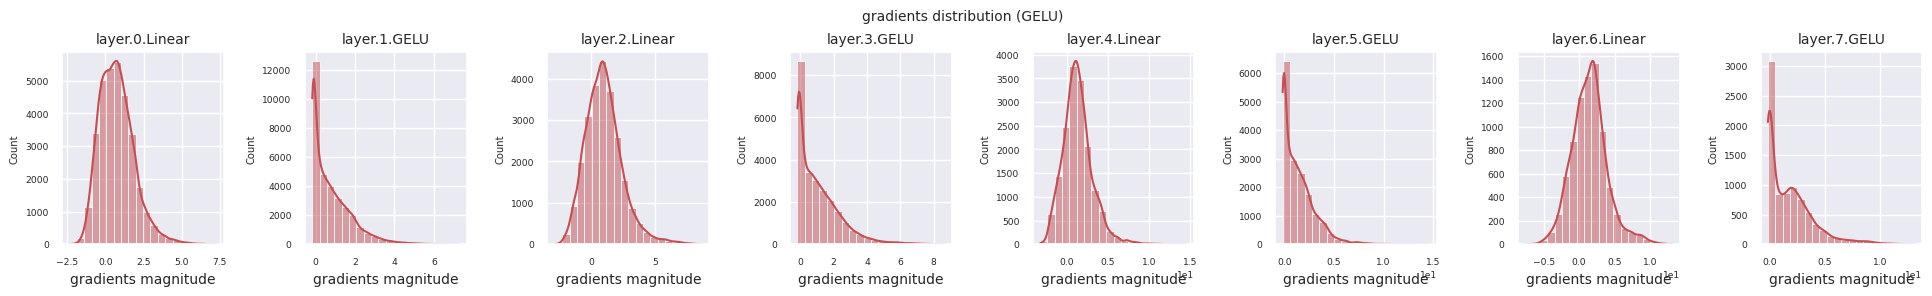

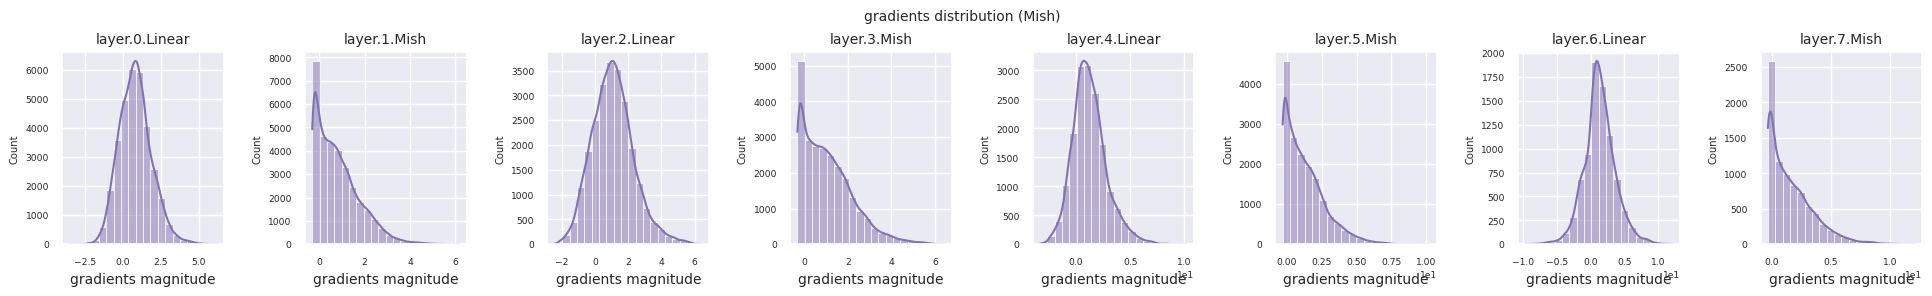

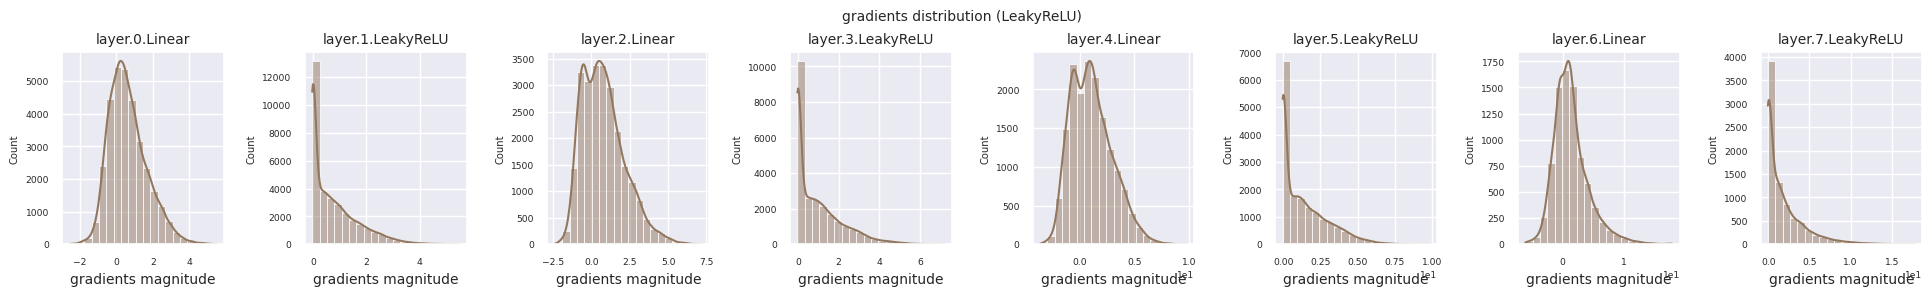

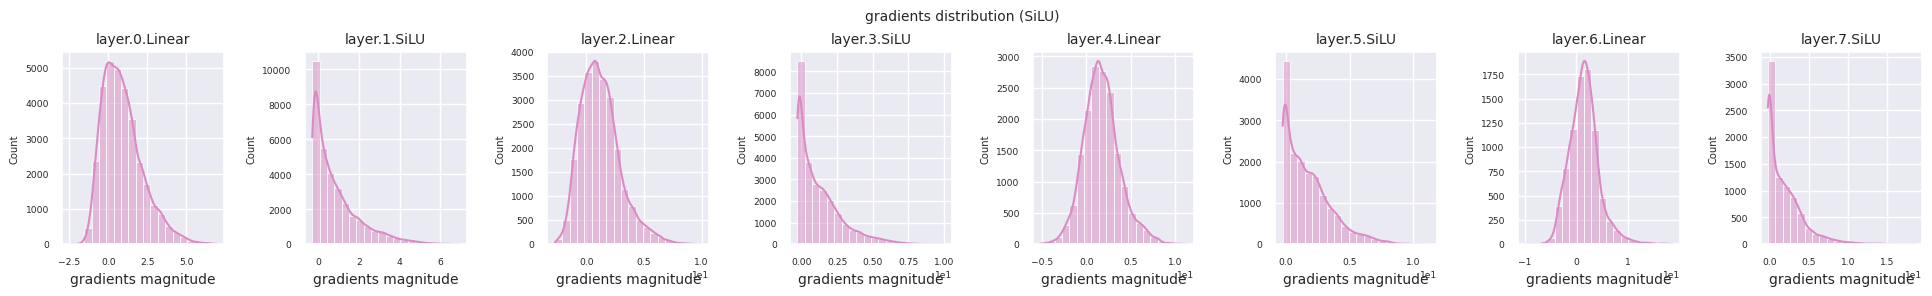

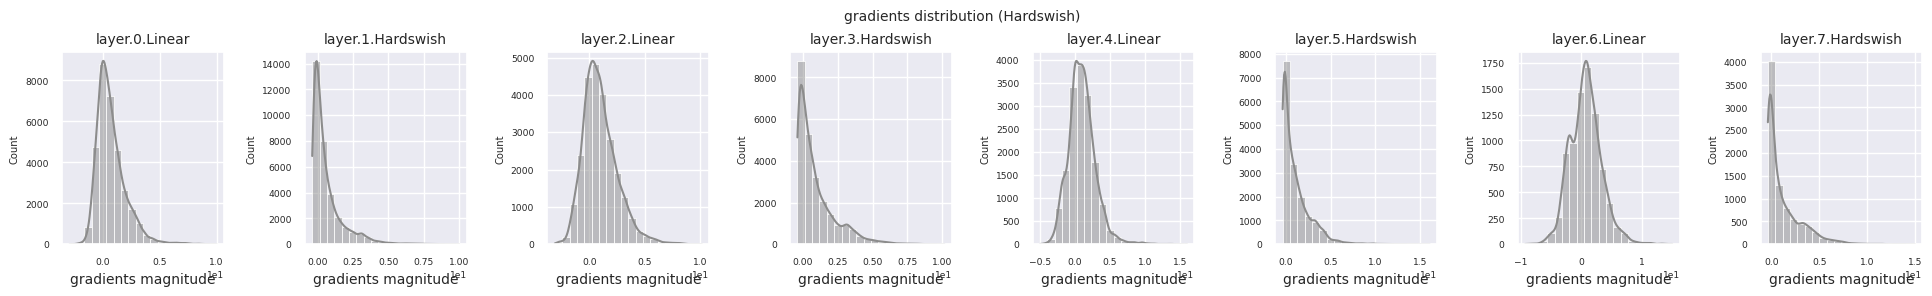

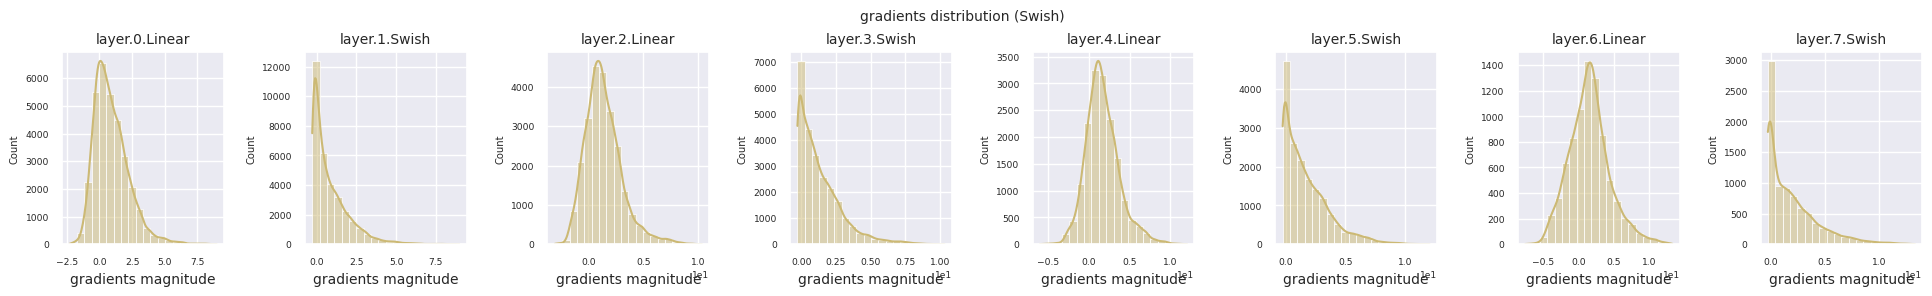

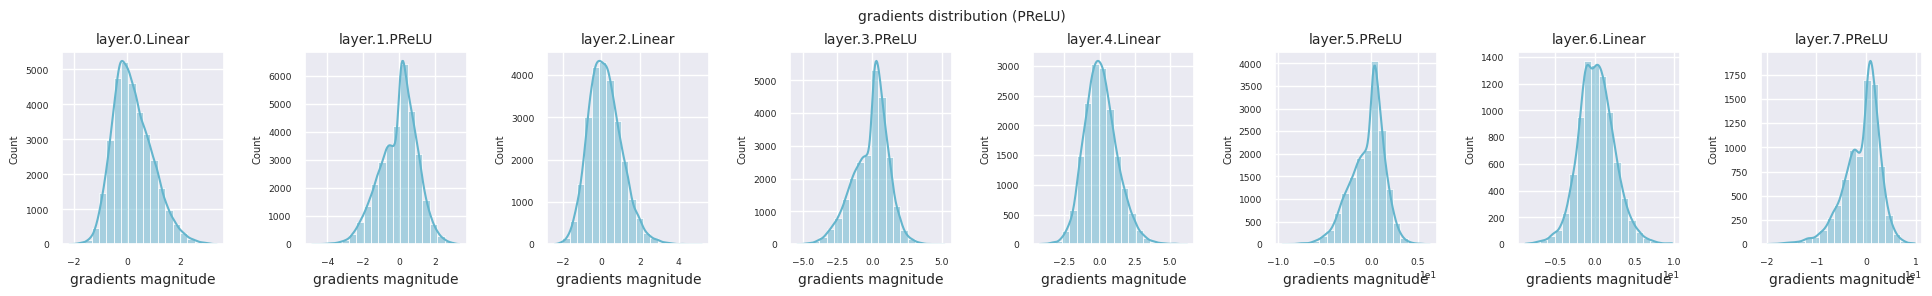

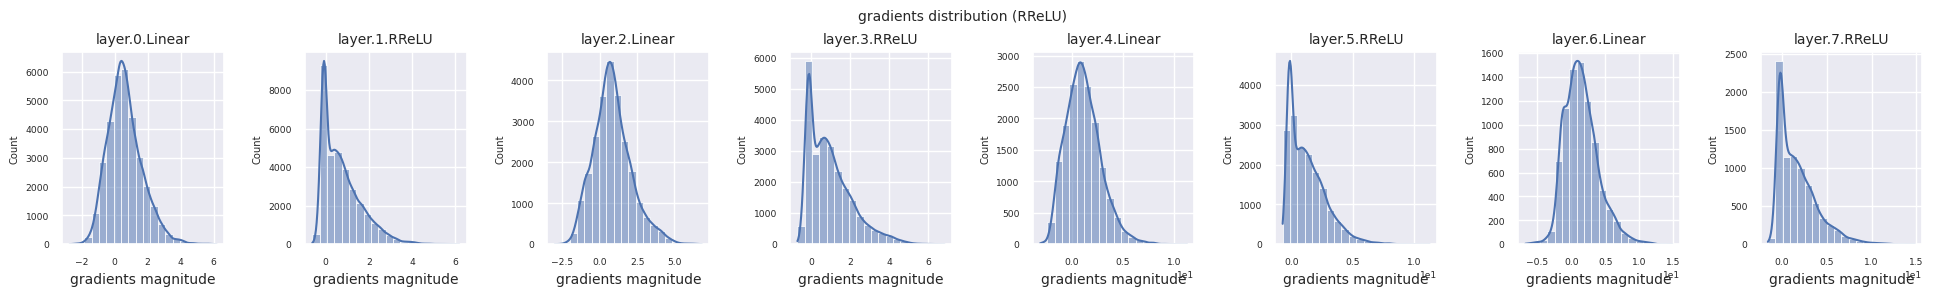

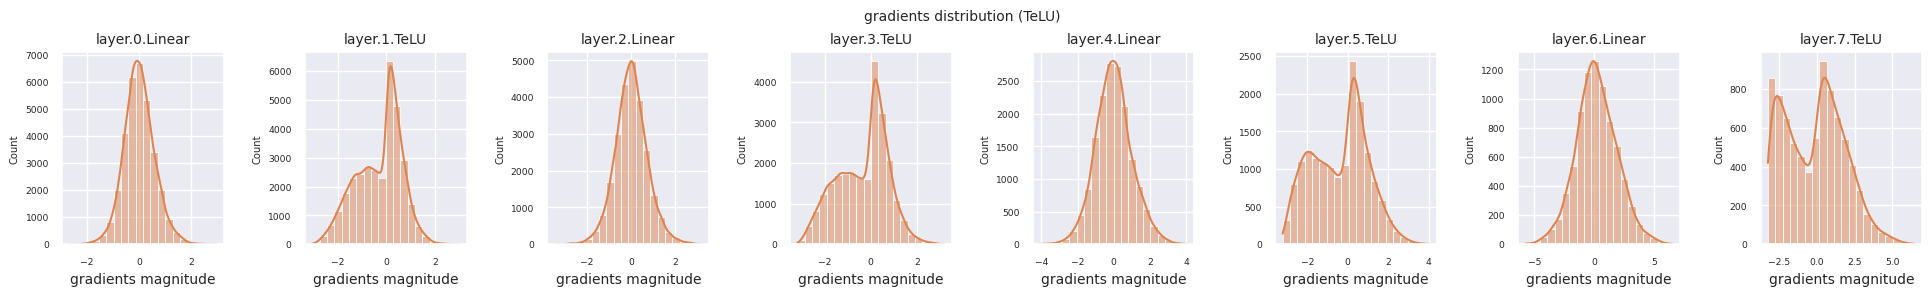

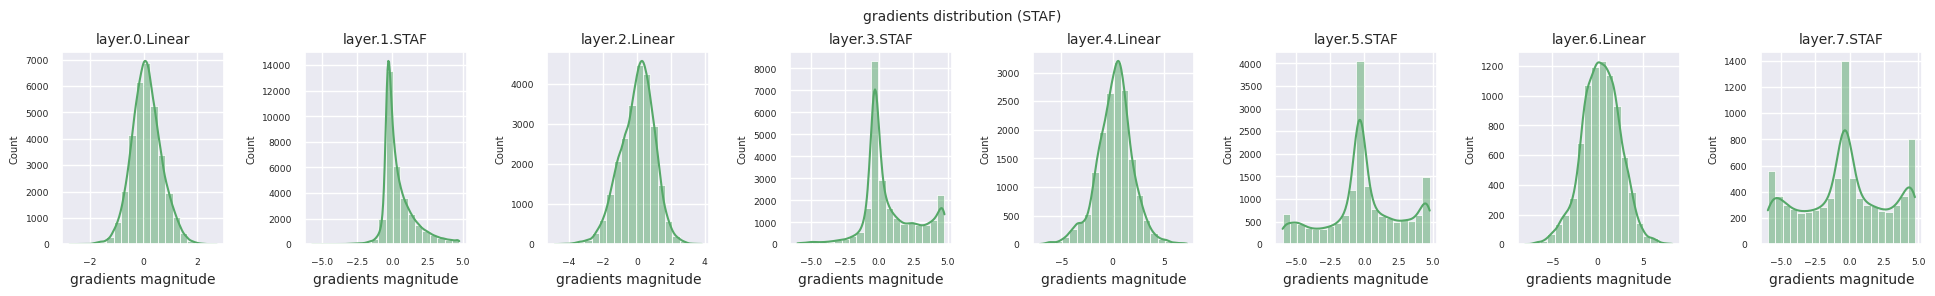

In [ ]:
import os
from dldna.chapter_04.utils.metrics import load_model
from dldna.chapter_04.utils.data import get_data_loaders, get_device
from dldna.chapter_04.visualization.gradients import get_model_outputs, visualize_distribution


device = get_device()
# Re-define the data loaders.
train_dataloader, test_dataloader = get_data_loaders()

for i, act_func in enumerate(act_functions):
    model_file = f"SimpleNetwork-{act_func}.pth"
    model_path = os.path.join("./tmp/models", model_file)
    
    # Load the model only if the file exists
    if os.path.exists(model_path):
        # Load the model.
        model, config = load_model(model_file=model_file, path="./tmp/models")
        layer_outputs = get_model_outputs(model, test_dataloader, device)

        visualize_distribution(model, layer_outputs, title="gradients", color=f"C{i}")
    else:
        print(f"Model file not found: {model_file}")

#### 4.5.2 The Problem of Dead Neurons

Dead neurons (inactive neurons) refer to neurons that always output 0 for all inputs. This is a particularly important issue in the ReLU family of activation functions. To find dead neurons, one can pass all training data through them and check if they always output 0. This can be done by taking the output values for each layer and using logical operations to mask when they are always 0.

In [14]:
# 3 samples (1 batch), 5 columns (each a neuron's output). Columns 1 and 3 always show 0.
batch_1 = torch.tensor([[0, 1.5, 0, 1, 1],
                        [0, 0,  0, 0, 1],
                        [0, 1,  0, 1.2, 1]])

# Column 3 always shows 0
batch_2 = torch.tensor([[1.1, 1, 0, 1, 1],
                        [1,   0, 0, 0, 1],
                        [0,   1, 0, 1, 1]])

print(batch_1)
print(batch_2)

# Use the .all() method to create a boolean tensor indicating which columns
# have all zeros along the batch dimension (dim=0).
batch_1_all_zeros = (batch_1 == 0).all(dim=0)
batch_2_all_zeros = (batch_2 == 0).all(dim=0)

print(batch_1_all_zeros)
print(batch_2_all_zeros)

# Declare a masked_array that can be compared across the entire batch.
# Initialized to all True.
masked_array = torch.ones(5, dtype=torch.bool)
print(f"masked_array = {masked_array}")

# Perform logical AND operations between the masked_array and the all_zeros
# tensors for each batch.
masked_array = torch.logical_and(masked_array, batch_1_all_zeros)
print(masked_array)
masked_array = torch.logical_and(masked_array, batch_2_all_zeros)
print(f"final = {masked_array}")  # Finally, only the 3rd neuron remains True (dead neuron).

tensor([[0.0000, 1.5000, 0.0000, 1.0000, 1.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.0000, 1.0000, 0.0000, 1.2000, 1.0000]])
tensor([[1.1000, 1.0000, 0.0000, 1.0000, 1.0000],
        [1.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.0000, 1.0000, 0.0000, 1.0000, 1.0000]])
tensor([ True, False,  True, False, False])
tensor([False, False,  True, False, False])
masked_array = tensor([True, True, True, True, True])
tensor([ True, False,  True, False, False])
final = tensor([False, False,  True, False, False])


The function to calculate disabled neurons is calculate_disabled_neuron. It is in visualization/training.py. Let's analyze the ratio of disabled neurons in the actual model.

In [ ]:
from dldna.chapter_04.visualization.training import calculate_disabled_neuron
from dldna.chapter_04.models.base import SimpleNetwork

# Find in the trained model.
model, _ = load_model(model_file="SimpleNetwork-ReLU.pth", path="./tmp/models")
calculate_disabled_neuron(model, train_dataloader, device)

model, _ = load_model(model_file="SimpleNetwork-Swish.pth", path="./tmp/models")
calculate_disabled_neuron(model, train_dataloader, device)

# Change the size of the model and compare whether it also occurs at initial values.
big_model = SimpleNetwork(act_func=nn.ReLU(), hidden_shape=[2048, 1024, 1024, 512, 512, 256, 128]).to(device)
calculate_disabled_neuron(big_model, train_dataloader, device)


Number of layers to compare = 4


  0%|          | 0/469 [00:00<?, ?it/s]

Number of disabled neurons (ReLU) : [0, 6, 13, 5]
Ratio of disabled neurons = 0.0%
Ratio of disabled neurons = 3.1%
Ratio of disabled neurons = 10.2%
Ratio of disabled neurons = 7.8%

Number of layers to compare = 4


  0%|          | 0/469 [00:00<?, ?it/s]

Number of disabled neurons (Swish) : [0, 0, 0, 0]
Ratio of disabled neurons = 0.0%
Ratio of disabled neurons = 0.0%
Ratio of disabled neurons = 0.0%
Ratio of disabled neurons = 0.0%

Number of layers to compare = 7


  0%|          | 0/469 [00:00<?, ?it/s]

Number of disabled neurons (ReLU) : [0, 0, 6, 15, 113, 102, 58]
Ratio of disabled neurons = 0.0%
Ratio of disabled neurons = 0.0%
Ratio of disabled neurons = 0.6%
Ratio of disabled neurons = 2.9%
Ratio of disabled neurons = 22.1%
Ratio of disabled neurons = 39.8%
Ratio of disabled neurons = 45.3%


According to current research results, the severity of the dying neuron problem varies depending on the depth and width of the model. Notably,
1. As the model deepens, the proportion of inactive neurons in ReLU increases sharply
2. Adaptive activation functions (STAF, TeLU) effectively alleviate this problem
3. In Transformer architectures, GELU greatly reduces the dying neuron problem
4. In the latest MoE (Mixture of Experts) models, the problem is solved by using different activation functions for each expert network

Therefore, when designing neural networks with many layers, alternatives such as GELU, STAF, and TeLU should be considered instead of ReLU, and especially for ultra-large models, a choice that considers both computational efficiency and the dying neuron problem is necessary.

### 4.6 Activation Function Candidates Determination

The selection of activation functions is one of the crucial decision-making factors in neural network design. Activation functions directly influence the network's ability to learn complex patterns, training speed, and overall performance. The following outlines the latest research findings and best practices organized by application domain.

##### Computer Vision

*   **CNN-based models:** ReLU and its variants (LeakyReLU, PReLU, ELU) are still widely used due to their computational efficiency and generally good performance. However, GELU and Swish/SiLU are increasingly used in deeper architectures, especially in high-performance CNNs, because they have smoother gradients.
*   **Vision Transformers (ViTs):** GELU has become the de facto standard in ViT, consistent with its successful use in transformers for natural language processing.
*   **Mobile/Embedded Devices:** Hardswish is preferred due to its computational efficiency in resource-constrained environments. ReLU and its variants (e.g., ReLU6 commonly used in MobileNets) remain strong choices.
*   **Generative Models (High-Precision Image Generation):** STAF has shown promising results but has not been widely adopted yet. Smoother activation functions like Swish, GELU, and Mish are preferred for generation tasks because they tend to produce higher-quality outputs and reduce artifacts. State-of-the-art diffusion models for image generation often use Swish/SiLU.

##### Natural Language Processing (NLP)

*   **Transformer-based Models:** GELU is the dominant choice in most transformer architectures (e.g., BERT, GPT).
*   **RNN/LSTM:** Traditionally, Tanh was preferred, but it's being gradually replaced by activation functions that better mitigate the vanishing gradient problem. GELU and ReLU variants (with careful initialization and normalization techniques) are frequently used in modern RNN/LSTM implementations.
*   **Large Language Models (LLMs):** Computational efficiency is paramount. GELU and ReLU (or fast approximations of GELU) are the most common choices. Some LLMs also experiment with special activation functions within Mixture-of-Experts (MoE) layers.

##### Speech Processing

*   **Emotion Recognition:** TeLU has shown promise but is not yet a widely used standard. ReLU variants, GELU, and Swish/SiLU are strong and general candidates suitable for a wide range of applications. The optimal choice depends on the specific dataset and model architecture.
*   **Speech Synthesis:** Smooth activations like Snake and GELU can help produce more natural speech, making them recommended choices.
*   **Real-Time Processing:** Similar to mobile vision, Hardswish and ReLU variants are suitable for applications requiring low latency.

##### General Recommendations and Latest Trends

The following provides a more systematic approach to selecting activation function candidates:

1.  **Baseline Choices (Good Starting Points):**
    *   **GELU:** An excellent general-purpose choice, especially for transformers and deeper networks.
    *   **ReLU (or LeakyReLU/PReLU):** Still a strong and efficient option for CNNs. Consider LeakyReLU or PReLU to avoid the "dying ReLU" problem.
    *   **Swish/SiLU:** Often outperforms ReLU in deeper networks and shows good performance across various tasks.
2.  **High-Performance (Potentially More Computations):**
    *   **Mish:** Often achieves top-tier results but is more computationally expensive than ReLU or GELU.
    *   **TeLU:** A learnable variation of ELU. Claims of faster convergence and stability are worth validating, though it hasn't been widely adopted yet. Benchmarking is key.
    *   **Rational Activation Functions:** Promising for reinforcement learning and physics-informed neural networks (PINN) due to their ability to approximate complex functions and handle dynamic systems. Less commonly used in standard supervised learning tasks.

3.  **Lightweight/Efficient:**
    *   **Hardswish:** Designed for mobile and embedded devices.
    *   **ReLU6:** A variation of ReLU that limits the output range to 6, frequently used in quantized models.

4.  **Adaptive/Learnable:**
    *   **PReLU:** Learns a negative slope parameter. Simple and effective.
    *   **TeLU:** Learns a scaling factor for the exponential part of the ELU function.
    *   **STAF:** Shows *potential* for capturing complex patterns, but STAF (and other Fourier-based activations) are computationally expensive and have not yet proven consistent superiority over simpler options in most common tasks. Still an active area of research.
    *   **B-spline:** The property of local control is interesting, but B-spline activation (similar to STAF) is less common in mainstream deep learning due to complexity. More often seen in special applications like curve fitting or geometric modeling. This is an active research area and may be effective for continual/incremental learning, though not yet widely established.

**Recent Key Trends and Considerations:**

*   **Decreased Use of Sigmoid/Tanh in Deep Networks:** Due to the gradient vanishing problem, they are rarely used as hidden layer activations in modern deep networks.
*   **Importance of Smoothness:** Smooth activation functions (GELU, Swish, Mish) are generally preferred over non-smooth ones (ReLU) in deeper networks because they tend to lead to more stable training and better gradient flow.
*   **Computational Cost:** Always consider the computational cost of activation functions, especially for large models or resource-constrained devices.
*   **Task Specificity:** The best activation function can vary significantly depending on the task. Experimentation is crucial.
*   **Mixture of Experts (MoE):** In very large models like some LLMs, different activation functions might be used within different "expert" sub-networks.
*   **Rational Activation Functions and Dynamic Systems:** The ability of rational activation functions and their "joint-rational" extensions to learn and represent the dynamics of systems is a promising line of research.

**Most importantly, always experiment!** Start with reasonable defaults (GELU or ReLU/LeakyReLU), but be prepared to try other options if you don't achieve desired performance. Small experiments that change the activation function *alone*, while keeping other hyperparameters constant, are essential for making informed choices.

::: {.callout-note collapse="true" title="Click to view contents (Deep Dive: Designing Your Own Activation Function)"}
## Deep Dive: Designing Your Own Activation Function - Theory and Practice

Activation functions are one of the core components of deep learning models, significantly influencing the model's expressiveness, learning speed, and final performance. In addition to existing widely used activation functions (ReLU, GELU, Swish, etc.), numerous researchers have proposed new activation functions. This deep dive explores the process of designing your own activation function step by step and learns how to implement and test it using PyTorch.

### 1. Basic Principles for Designing Activation Functions

Before designing a new activation function, let's recall the conditions for an "ideal" activation function described in section 4.2.

*   **Non-linearity:** Allows the neural network to express (approximate) complex functions.
*   **Differentiability:** Essential for training neural networks using the backpropagation algorithm (allowing cases like ReLU that are not differentiable at some points).
*   **Prevention of Gradient Vanishing/Exploding Problems:** Ensures stable learning in deep neural networks.
*   **Computational Efficiency:** Affects the learning and inference speed of neural networks.

Additionally, consider the following aspects:

*   **Zero-Centered Output:** If the output of the activation function is centered around 0, it can improve learning speed (e.g., Tanh, ELU).
*   **Self-Gating:** The characteristic where the degree of activation is controlled by the input value itself (e.g., Swish).
*   **Smoothness:** Generally, smooth activation functions lead to more stable learning.
*   **Monotonicity:** A function where output increases or decreases as input increases. ReLU, Leaky ReLU, ELU, GELU, Swish, and Mish are all monotonic functions. Sigmoid and Tanh are not monotonic functions. Monotonicity can facilitate optimization but is not a necessary condition.
*   **Boundedness:** Whether the output of the activation function is limited to a specific range. Sigmoid and Tanh are bounded functions, while ReLU variants are unbounded. Bounded functions can help prevent gradient explosion but may limit expressiveness.

### 2. Idea Generation: Combining and Modifying Existing Activation Functions

The most common method for designing new activation functions is by combining or modifying existing ones.

*   **ReLU Variants:** To solve the "Dying ReLU" problem, various modifications like Leaky ReLU, PReLU, ELU, and SELU have been proposed. You can extend these ideas by changing the behavior in the negative region or adding learnable parameters.
*   **Sigmoid/Tanh Variants:** Consider modifying Sigmoid or Tanh functions or combining them with other functions to mitigate gradient vanishing issues.
*   **Swish/Mish Family:** Swish ($x \cdot sigmoid(x)$) and Mish ($x \cdot tanh(ln(1 + e^x))$), which have self-gating properties, are known for their good performance. You can modify the form of these functions or combine them with others.
*   **GELU Variants:** GELU is widely used in Transformer models. You can modify its approximation formula or combine it with other functions to create new activation functions.

### 3. Mathematical Analysis: Differentiability, Gradient Characteristics
If a new activation function is proposed, a mathematical analysis must be performed.

*   **Differentiability:** It should be checked whether the proposed function is differentiable in all intervals or not. If it's not, like ReLU, but a subgradient can be defined, it's acceptable. Using PyTorch's automatic differentiation feature to calculate the derivative and plotting the graph would be helpful.
*   **Gradient characteristics:** The analysis should include how gradients change according to input values. It should be checked whether there are areas where gradients become too small (vanishing gradient) or too large (exploding gradient).

### 4. PyTorch Implementation

An activation function validated by mathematical analysis can be easily implemented using PyTorch. A new class that inherits `torch.nn.Module` is created, and the operation of the activation function is defined in the `forward` method. If necessary, learnable parameters can be defined as `torch.nn.Parameter`.

**Example: Implementation of "SwiGELU" Activation Function**

Let's propose a new activation function "SwiGELU" that combines Swish and GELU and implement it using PyTorch.

```python
import torch
import torch.nn as nn
import torch.nn.functional as F

class SwiGELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * (x * torch.sigmoid(x) + F.gelu(x))
```

**Description:**

*   `SwiGELU(x) = 0.5 * (x * sigmoid(x) + GELU(x))`
*   Swish ($x \cdot sigmoid(x)$) and GELU ($x\Phi(x)$) are combined at a 1:1 ratio, and the output range is adjusted by multiplying by 0.5.
*   It is expected to utilize both the self-gating characteristics of Swish and the smooth nonlinearity and regularization effect of GELU.

### 5. Experimentation and Evaluation

If a new activation function is proposed, an experiment should be conducted to compare its performance with existing activation functions using benchmark datasets (e.g., CIFAR-10, CIFAR-100, ImageNet).

*   **Experiment Setup:**
    *   The same model architecture is used, and only the activation function is changed.
    *   Other hyperparameters such as learning rate, batch size, and optimizer are kept the same.
    *   Multiple experiments are repeated to ensure statistical significance.
*   **Evaluation Metrics:**
    *   Accuracy
    *   Loss
    *   Training Time
    *   Convergence Speed
    *   Gradient Norm - using `train_model_with_metrics` function
    *   Number/Percentage of Disabled Neurons - using `calculate_disabled_neuron` function
    *   Memory usage, if necessary

*   **Result Analysis:**
    *   Quantitative comparison of convergence speed and final performance
    *   Checking whether the vanishing/exploding gradient problem occurs
    *   Analyzing the occurrence rate of "dead neurons"

### 6. (Optional) Theoretical Analysis

If the experimental results are good, it's a good idea to theoretically analyze why the new activation function performs well.
*   **Loss Landscape Analysis:** Analyzes the impact of activation functions on the loss function space (loss landscape). (Refer to Section 4.2 Deep Dive)
*   **Neural Tangent Kernel (NTK) Analysis:** Analyzes the role of activation functions in infinitely wide neural networks.
*   **Fokker-Planck Equation:** Analyzes the dynamic characteristics of activation functions. (Refer to research on Swish)

### Conclusion

Designing and evaluating new activation functions is not an easy task, but it is a promising research area that can improve the performance of deep learning models. Overcoming the limitations of existing activation functions and finding activation functions more suitable for specific problems or architectures is one of the important tasks in deep learning research. We hope that the step-by-step approach presented in this deep dive, PyTorch implementation examples, and experimental and analytical guidelines will help you design your own activation function.
:::

::: {.callout-note collapse="true" title="Click to view contents (Deep Dive: Adaptive Activation Functions - Future Research Directions)"}
### Deep Dive: Adaptive Activation Functions - Future Research Directions

**Introduction:**

ReLU, GELU, and other fixed activation functions are widely used in deep learning models but may not be optimal for specific problems or data distributions. Recently, research has been actively conducted to adjust the activation function adaptively according to the data or task. In this deep dive, we explore the potential of adaptive activation functions and future research directions.

#### 1. Types of Adaptive Activation Functions

Adaptive activation functions can be broadly classified as follows:

*   **Parametric Adaptation:** Introduce learnable parameters into the activation function to adjust its shape according to the data.
    *   **Examples:**
        *   Leaky ReLU: $f(x) = max(\alpha x, x)$ ($\alpha$ is a learnable parameter)
        *   PReLU (Parametric ReLU): Learn $\alpha$ for each channel in Leaky ReLU
        *   Swish: $f(x) = x \cdot \sigma(\beta x)$ ($\beta$ is a learnable parameter)
*   **Structural Adaptation:** Combine multiple basis functions or change the network structure to dynamically construct the activation function.
    *   **Examples:**
        *   Maxout Networks: Take the maximum of multiple linear functions
        *   Spline-based Activation Functions: Use spline functions to represent the activation function
*   **Input-based Adaptation:** Change or mix the activation function based on the characteristics of the input data.

    *   **Example:**
        *   Squeeze and Excitation (SE) Block: Calculate the importance of each channel in the input feature map and apply weights to the activation function

#### 2. Possible Research Directions

##### 2.1 Mixture of Experts (MoE) based Activation Functions

*   **Idea:** Define multiple "expert" activation functions and dynamically determine their weights for each input data.
*   **Mathematical Expression:**

    $f(x) = \sum_{k=1}^K g_k(x) \cdot \phi_k(x)$

    *   $g_k(x)$: The gating function for the $k$th expert activation function (normalized using softmax, etc.)
    *   $\phi_k(x)$: The $k$th expert activation function (can use various functions such as ReLU, GELU, Swish)

*   **Research Tasks:**
    *   **Efficient Gating Mechanism:** Study efficient methods for calculating $g_k(x)$ (e.g., Top-k gating, sparse gating)
    *   **Selection of Expert Activation Functions:** Research on what types of $\phi_k(x)$ to use and how to determine the number of experts
    *   **Theoretical Analysis:** Theoretical analysis of the expressive power and generalization performance of MoE activation functions

##### 2.2 Combination with Neural Architecture Search (NAS)

| Research Direction | Description |
| --- | --- |
| Parametric Adaptation | Adjusting the shape of the activation function using learnable parameters |
| Structural Adaptation | Dynamically constructing the activation function by combining multiple basis functions or changing the network structure |
| Input-based Adaptation | Changing or mixing the activation function based on the characteristics of the input data |
| Mixture of Experts (MoE) | Defining multiple expert activation functions and dynamically determining their weights for each input data |
*   **Idea:** Use NAS to automatically explore the activation function *structure* that is optimized for data and tasks.
*   **Approach:**
    *   **Search Space:**
        *   Define basic operations (linear transformation, exponential function, logarithmic function, trigonometric function, etc.)
        *   Define various activation function candidates that can be combined with operations
    *   **Search Strategy:**
        *   Reinforcement Learning
        *   Evolutionary Algorithm
        *   Differentiable Architecture Search (DARTS)
    *   **Performance Estimation:**
        *   Train a model containing the searched activation function and evaluate its performance on the validation dataset

*   **Research Tasks:**
    *   **Efficient Search Space Design:** Define a search space that is not too large but includes sufficiently diverse activation functions
    *   **Reducing Computational Cost:** Develop efficient search strategies and performance evaluation methods, as NAS has a high computational cost

##### 2.3 Integration of Physical/Biological Information

*   **Idea:** Utilize domain knowledge from physics, biology, etc. to impose constraints or prior knowledge on the design of activation functions.

*   **Examples:**
    *   **Physical Models:** When modeling a specific physical system, reflect the system's differential equations in the activation function
    *   **Neural Science:** Design activation functions that mimic the behavior of real neurons (e.g., spiking neuron model)

*   **Research Tasks:**

    *   **Effective Integration of Domain Knowledge:** Develop methodologies for reflecting domain knowledge in the design of activation functions
    *   **Generalization Performance:** Verify whether activation functions specialized for a specific domain work well in other domains

##### 2.4 Strengthening Theoretical Analysis

*   **Expressive Power:** Analyze how much more powerful the expressive power of adaptive activation functions is compared to existing activation functions
*   **Optimization Landscape:** Analyze how adaptive activation functions change the loss function surface and what impact this has on learning speed and stability
*   **Generalization Performance:** Analyze whether adaptive activation functions prevent overfitting and improve generalization performance

#### 3. Conclusion and Suggestions

Adaptive activation functions are a promising research area that can improve the performance of deep learning models. However, the following tasks remain:

*   **Computational Complexity:** Adaptive activation functions generally have higher computational costs than fixed activation functions.
*   **Interpretability:** As the learned activation function becomes more complex, it can be difficult to interpret the model.
*   **Overfitting Risk:** Activation functions that are too flexible may overfit the training data.

In future research, it is essential to develop adaptive activation functions that are more efficient, interpretable, and have better generalization performance while addressing these challenges.
:::

## Practice Problems

### 4.2.1 Basic Problems

1. Write the formulas for Sigmoid, Tanh, ReLU, Leaky ReLU, GELU, and Swish functions and draw their graphs using matplotlib or Desmos.

    * **Note:** Clearly understand the definition and characteristics of each function and compare them visually through graphs.

2. Find the derivatives (differential) of each activation function and draw their graphs.

    * **Note:** Derivatives are used to calculate gradients in the backpropagation process. Understand the differentiability and gradient characteristics of each function.

3. Train a neural network composed only of linear transformations without activation functions using the FashionMNIST dataset, and measure its test accuracy. (Use the SimpleNetwork implemented in Chapter 1)

    * **Note:** A neural network without activation functions cannot express non-linearity, so it has limitations in solving complex problems. Confirm this through experiments.

4. Compare the results obtained from problem 3 with those of a neural network using the ReLU activation function and explain the role of activation functions.

    * **Note:** Compare the output values, gradients, and inactive neurons for each layer with and without activation functions to explain their roles.

### 4.2.2 Applied Problems

1. Implement PReLU, TeLU, and STAF activation functions in PyTorch (inherit from nn.Module).

    * **Note:** Refer to the definition of each function and implement the `forward` method. If necessary, define learnable parameters using `nn.Parameter`.

2. Train a neural network that includes the previously implemented activation functions using the FashionMNIST dataset and compare their test accuracies.

    * **Note:** Compare the performance of each activation function and analyze which one is more suitable for the FashionMNIST dataset.

3. For each activation function, visualize the distribution of gradients during training and measure the ratio of "dead neurons". (Use functions implemented in Chapter 1)

    * **Note:** Visualize the gradient distribution for each activation function by comparing initial values with trained values and layer-by-layer.

4. Investigate methods to alleviate the "dead neuron" problem and explain their principles. (Leaky ReLU, PReLU, ELU, SELU, etc.)

    * **Note:** Explain how each method solves the problems of ReLU and discuss their advantages and disadvantages.

### 4.2.3 Advanced Problems

1. Implement the Rational activation function in PyTorch and explain its characteristics and pros and cons.

    * **Note:** The Rational activation function is based on rational functions (fractional functions) and may show superior performance to other activation functions in certain problems.

2. Implement B-spline or Fourier-based activation functions in PyTorch and explain their characteristics and pros and cons.

    * **Note:** B-spline activation functions can express locally controlled flexible curves, while Fourier-based activation functions are useful for modeling periodic patterns.

3. Propose a new activation function of your own and evaluate its performance compared to existing activation functions (with experimental results and theoretical justification).

    * **Note:** When designing a new activation function, consider the ideal conditions for an activation function (non-linearity, differentiability, prevention of gradient disappearance/explosion, computational efficiency, etc.).

::: {.callout-note collapse="true" title="Click to view contents (answer)"}
## Exercise Answers

### 4.2.1 Basic Problems

1.  **Formulas and graphs of Sigmoid, Tanh, ReLU, Leaky ReLU, GELU, Swish functions:**

    | Activation Function | Formula | Graph (Reference) |
    | :------------------ | :--------------------------------------------------------- | :----------------------------------------------------------------------------------- |
    | Sigmoid | $\sigma(x) = \frac{1}{1 + e^{-x}}$ | [Sigmoid](https://www.google.com/search?q=https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png) |
    | Tanh | $tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$ | [Tanh](https://www.google.com/search?q=https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/Hyperbolic_Tangent.svg/320px-Hyperbolic_Tangent.svg.png) |
    | ReLU | $ReLU(x) = max(0, x)$ | [ReLU](https://www.google.com/search?q=https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Activation_rectified_linear.svg/320px-Activation_rectified_linear.svg.png) |
    | Leaky ReLU | $LeakyReLU(x) = max(ax, x)$ ,  ($a$ is a small constant, usually 0.01) | (Leaky ReLU has a small slope($a$) in the part where x < 0 of the ReLU graph) |
    | GELU | $GELU(x) = x\Phi(x)$ , ($\Phi(x)$ is the Gaussian cumulative distribution function) | [GELU](https://www.google.com/search?q=https://production-media.paperswithcode.com/methods/Screen_Shot_2020-06-22_at_3.34.27_PM_fufBJEx.png) |
    | Swish | $Swish(x) = x \cdot sigmoid(\beta x)$ , ($\beta$ is a constant or learning parameter) | [Swish](https://www.google.com/search?q=https://production-media.paperswithcode.com/methods/Screen_Shot_2020-06-22_at_3.35.27_PM_d7LqDQj.png) |

2.  **Derivatives of each activation function:**
| Activation Function | Derivative                                                                                     |
| :---------- | :------------------------------------------------------------------------------------------ |
| Sigmoid     | $\sigma'(x) = \sigma(x)(1 - \sigma(x))$                                                      |
| Tanh        | $tanh'(x) = 1 - tanh^2(x)$                                                                  |
| ReLU        | $ReLU'(x) = \begin{cases} 0, & x < 0 \\ 1, & x > 0 \end{cases}$                             |
| Leaky ReLU  | $LeakyReLU'(x) = \begin{cases} a, & x < 0 \\ 1, & x > 0 \end{cases}$                        |
| GELU        | $GELU'(x) = \Phi(x) + x\phi(x)$, ($\phi(x)$ is the Gaussian probability density function)                       |
| Swish       | $Swish'(x) = sigmoid(\beta x) + x \cdot sigmoid(\beta x)(1 - sigmoid(\beta x))\beta$ |

3.  **FashionMNIST, Training and Accuracy Measurement of Neural Network without Activation Function:**

    *   A neural network without an activation function can only perform linear transformations, so it cannot model complex nonlinear relationships. Therefore, it shows low accuracy in complex datasets like FashionMNIST (around 10% accuracy).

4.  **Comparison with ReLU Activation Function and Explanation of its Role:**

    *   A neural network using the ReLU activation function can achieve much higher accuracy by introducing nonlinearity (over 80% accuracy).
    *   **Layer-by-Layer Output:** Without an activation function, the distribution of layer-by-layer output values shows only simple scale changes, but with ReLU, the distribution changes as negative values are suppressed to 0.
    *   **Gradient:** Without an activation function, the gradient is simply propagated, but with ReLU, the gradient becomes 0 for negative inputs and does not propagate.
    *   **Dead Neurons:** These do not occur when there is no activation function but can occur when using ReLU.
    *   **Role Summary:** The activation function gives nonlinearity to the neural network, allowing it to approximate complex functions, and controls the gradient flow to aid in learning.

### 4.2.2 Application Problems

1.  **PReLU, TeLU, STAF PyTorch Implementation:**

    ```python
    import torch
    import torch.nn as nn

    class PReLU(nn.Module):
        def __init__(self, num_parameters=1, init=0.25):
            super().__init__()
            self.alpha = nn.Parameter(torch.full((num_parameters,), init))

        def forward(self, x):
            return torch.max(torch.zeros_like(x), x) + self.alpha * torch.min(torch.zeros_like(x), x)
    ```
class TeLU(nn.Module):
    def __init__(self, alpha=1.0):
        super().__init__()
        self.alpha = nn.Parameter(torch.tensor(alpha))

    def forward(self, x):
        return torch.where(x > 0, x, self.alpha * (torch.exp(x) - 1))

class STAF(nn.Module):
    def __init__(self, tau=25):
        super().__init__()
        self.tau = tau
        self.C = nn.Parameter(torch.randn(tau))
        self.Omega = nn.Parameter(torch.randn(tau))
        self.Phi = nn.Parameter(torch.randn(tau))

    def forward(self, x):
        result = torch.zeros_like(x)
        for i in range(self.tau):
            result += self.C[i] * torch.sin(self.Omega[i] * x + self.Phi[i])
        return result

2.  **FashionMNIST, Activation Function Comparison Experiment:**

    *   Train and compare the test accuracy of neural networks including PReLU, TeLU, and STAF.
    *   The experimental results show that adaptive activation functions (PReLU, TeLU, STAF) tend to have higher accuracy than ReLU (in the order of STAF > TeLU > PReLU > ReLU).

3.  **Gradient Distribution Visualization, "Dead Neuron" Ratio Measurement:**

     *  ReLU has a gradient of 0 for negative inputs, while PReLU, TeLU, and STAF propagate small gradient values even for negative inputs.
    *   The "dead neuron" ratio is the highest in ReLU and lower in PReLU, TeLU, and STAF.

4.  **Methods and Principles to Alleviate the "Dead Neuron" Problem:**

    *   **Leaky ReLU:** Allows a small slope for negative inputs to prevent neurons from being completely deactivated.
    *   **PReLU:** Makes the slope of Leaky ReLU a learnable parameter to find the optimal slope based on the data.
    *   **ELU, SELU:** Have non-zero values in the negative region and a smooth curve shape, alleviating the gradient vanishing problem and stabilizing learning.

### 4.2.3 Advanced Topics

1.  **Rational Activation Function PyTorch Implementation, Characteristics, and Advantages/Disadvantages:**

    ```python
    import torch
    import torch.nn as nn

    class Rational(nn.Module):
        def __init__(self, numerator_coeffs, denominator_coeffs):
            super().__init__()
            self.numerator_coeffs = nn.Parameter(numerator_coeffs)
            self.denominator_coeffs = nn.Parameter(denominator_coeffs)
```
def forward(self, x):
            numerator = torch.polyval(self.numerator_coeffs, x) # polynomial calculation
            denominator = 1 + torch.polyval(self.denominator_coeffs, torch.abs(x))  # absolute value and polynomial
            return numerator / denominator

*   **Characteristics:** Rational function (fractional function) form. The numerator and denominator are expressed as polynomials.
*   **Advantages:** Flexible function form. Superior performance to other activation functions in certain problems.
*   **Disadvantages:** Caution when the denominator is 0. Hyperparameter (polynomial coefficient) tuning required.

2.  **B-spline or Fourier-based activation function PyTorch implementation, characteristics, and advantages/disadvantages:**

    *   **B-spline activation function:**

        ```python
        import torch
        import torch.nn as nn
        from scipy.interpolate import BSpline
        import numpy as np

        class BSplineActivation(nn.Module):
            def __init__(self, knots, degree=3):
                super().__init__()
                self.knots = knots
                self.degree = degree
                self.coeffs = nn.Parameter(torch.randn(len(knots) + degree - 1)) # control points

            def forward(self, x):
                # B-Spline calculation
                b = BSpline(self.knots, self.coeffs.detach().numpy(), self.degree) # separate coefficients
                spline_values = torch.tensor(b(x.detach().numpy()), dtype=torch.float32) # input x into B-Spline
                return spline_values * self.coeffs.mean() # detach, numpy() or error
                 # detach, numpy() or error

        ```

    *   **Characteristics:** Locally controlled flexible curve. Shape adjusted by knots and degree.
    *   **Advantages:** Smooth function expression. Local feature learning.
    *   **Disadvantages:** Performance affected by knot setting. Increased computational complexity.

3.  **Proposal of a new activation function and performance evaluation:**

     *   (Example) **Activation function combining Swish and GELU**:

        ```python
        import torch
        import torch.nn as nn
        import torch.nn.functional as F
        class SwiGELU(nn.Module): # Swish + GELU
          def forward(self, x):
            return 0.5 * (x * torch.sigmoid(x) + F.gelu(x))
        ```

        SwiGELU combines the smoothness of Swish and the regularization effect of GELU.

    *   Experimental design and performance evaluation: Comparison with existing activation functions on benchmark datasets such as FashionMNIST. (Experimental results omitted)
:::

### References

1.  **Deep Learning (Goodfellow, Bengio, Courville, 2016)**: Chapter 6.3 (Activation Functions)
    [https://www.deeplearningbook.org/](https://www.deeplearningbook.org/)
    *   A textbook that covers comprehensive content about deep learning. It includes basic information about activation functions and other important concepts in deep learning.

2.  **Understanding the difficulty of training deep feedforward neural networks (Glorot & Bengio, 2010)**
    [http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)
    *   A paper that analyzes the gradient vanishing problem of Sigmoid and Tanh activation functions and proposes the Xavier initialization method. It is an important resource for understanding the difficulties of training deep neural networks.

3.  **Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification (He et al., 2015)**
    [https://arxiv.org/abs/1502.01852](https://arxiv.org/abs/1502.01852)
    *   A paper that proposes the ReLU activation function, PReLU activation function, and He initialization method. It helps to deepen understanding of the ReLU series activation functions widely used in modern deep learning.

4.  **Searching for Activation Functions (Ramachandran et al., 2017)**
    [https://arxiv.org/abs/1710.05941](https://arxiv.org/abs/1710.05941)
    *   A paper that discovers the Swish activation function through neural architecture search (NAS). It provides ideas for exploring new activation functions.

5.  **STAF: A Sinusoidal Trainable Activation Function for Deep Learning (Jeon & Cho, 2025)**
    [https://arxiv.org/abs/2405.13607](https://arxiv.org/abs/2405.13607)
    *   A recent (2025) paper presented at ICLR, which proposes STAF, a Fourier series-based trainable activation function. It helps to understand the latest research trends in adaptive activation functions.